# Barcelona Accidents Analysis & Car Drivers Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.max_columns',50)

In [3]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import Datasets:

Los archivos de BCN entre 2010 y 2016, tienen distintos encoding, para lo cual he creado una funcion que asigna un encoding a partir de las primeras 20 rows del data set. Este encoding tiene una probabilidad de éxito, que puede endontrarse dentro de rawdata.

Particularmente, los años 2014 y 2016 tienen distintos encodings al resto de los datasets. Con esta funcion se ha solucionado el año 2016 por completo, pero para el 2014 deberé hacer arreglos manuales mas adelante.

In [5]:
import chardet

#Funcion para predecir el encoding de un archivo:
def predict_encoding(file_path, n_lines=20):
        with open(file_path, 'rb') as f:
            rawdata = b''.join([f.readline() for _ in range(n_lines)])
            return chardet.detect(rawdata)['encoding'] 

In [6]:
file='2010_accidents.csv'
df_10=pd.read_csv(file,encoding=predict_encoding(file))

In [7]:
file='2011_accidents.csv'
df_11=pd.read_csv(file,encoding=predict_encoding(file))

In [8]:
file='2012_accidents.csv'
df_12=pd.read_csv(file,encoding=predict_encoding(file))

In [9]:
file='2013_accidents.csv'
df_13=pd.read_csv(file,encoding=predict_encoding(file))

In [10]:
predict_encoding('2014_accidents.csv')

'Windows-1252'

In [14]:
#latin-1 es similar a W-1252. de todas formas veremos que sigue habiendo errores en palabras con caracteres particulares del Catalan
df_14=pd.read_csv('2014_accidents.csv',encoding='latin-1')
df_14.head()

N£mero d'expedient Codi districte Nom districte Codi barri  \
0        2014S005506              2      Eixample          6   
1        2014S005514              2      Eixample          9   
2        2014S003949              2      Eixample         10   
3        2014S004136              2      Eixample          7   
4        2014S003641              4     Les Corts         20   

                        Nom barri Codi carrer Nom carrer Num postal caption  \
0              la Sagrada Fam¡lia      178308     Lepant         0222X0222X   
1  la Nova Esquerra de l'Eixample      245802      Par¡s          0001 0001   
2                     Sant Antoni      308709   Sant Pau          0059 0059   
3          la Dreta de l'Eixample      305100  Sant Joan          0094 0094   
4      la Maternitat i Sant Ramon      343903      Corts          0146 0148   

  Descripci¢ dia setmana Dia setmana Descripci¢ tipus dia  NK Any  Mes de any  \
0                 Dijous          Dj              Laboral    2014           7   
1                 Dijous          Dj              Laboral    2014           7   
2                 Dijous          Dj              Laboral    2014           5   
3                 Dijous          Dj              Laboral    2014           6   
4               Dissabte          Ds              Laboral    2014           5   

  Nom mes  Dia de mes  Hora de dia  Descripci¢ causa vianant  \
0  Juliol          24           11  No s causa del  vianant   
1  Juliol          24            7  No s causa del  vianant   
2    Maig          29           12  No s causa del  vianant   
3    Juny           5            1  No s causa del  vianant   
4    Maig          17            1  No s causa del  vianant   

  Desc. Tipus vehicle implicat Descripci¢ sexe Descripci¢ tipus persona Edat  \
0                  Motocicleta            Home                Conductor   27   
1                  Motocicleta            Home                Conductor   41   
2                      Turismo            Home                Passatger   51   
3                  Motocicleta            Dona                Conductor   43   
4                  Motocicleta            Home                Conductor   37   

  Descripci¢ victimitzaci¢ Coordenada UTM (Y) Coordenada UTM (X)  
0               Ferit lleu         4583917,29          431591,86  
1               Ferit lleu         4582196,98          428465,08  
2               Ferit lleu         4581206,32          430221,99  
3               Ferit lleu          4583558,8          430785,21  
4               Ferit lleu         4581661,12           427088,8

In [12]:
file='2015_accidents.csv'
df_15=pd.read_csv(file,encoding=predict_encoding(file))

In [13]:
file='2016_accidents.csv'
df_16=pd.read_csv(file,encoding=predict_encoding(file))

# Checking Data:

In [ ]:
#Reviso si los datasets contienen las mismas columnas:
print(df_10.columns==df_11.columns)
print(df_11.columns==df_12.columns)
print(df_12.columns==df_13.columns)

In [19]:
#cuenta de cantidad de columnas:
print('Features 2013:',df_13.columns.value_counts().sum())
print('Features 2014:',df_14.columns.value_counts().sum())
print('Features 2015:',df_15.columns.value_counts().sum())
print('Features 2016:',df_16.columns.value_counts().sum())


Features 2013: 25
Features 2014: 24
Features 2015: 24
Features 2016: 28


In [20]:
#similaridad de columas 14 y 15:
df_14.columns==df_15.columns

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True])

In [21]:
#Columnas distintas entre 14 y 15
set(df_14.columns).symmetric_difference(set(df_15.columns))

{'Descripci¢ causa vianant',
 'Descripci¢ dia setmana',
 'Descripci¢ sexe',
 'Descripci¢ tipus dia',
 'Descripci¢ tipus persona',
 'Descripci¢ victimitzaci¢',
 'Descripció causa vianant',
 'Descripció dia setmana',
 'Descripció sexe',
 'Descripció tipus dia',
 'Descripció tipus persona',
 'Descripció victimització',
 "N£mero d'expedient",
 "Número d'expedient"}

In [22]:
#columnas distintas entre 15 y 16
set(df_15.columns).symmetric_difference(set(df_16.columns))

{'Descripció situació', 'Descripció torn', 'Lat', 'Long'}

In [23]:
#columnas similares entre 15 y 16
set(df_15.columns).intersection(set(df_16.columns))

{'Codi barri',
 'Codi carrer',
 'Codi districte',
 'Coordenada UTM (X)',
 'Coordenada UTM (Y)',
 'Desc. Tipus vehicle implicat',
 'Descripció causa vianant',
 'Descripció dia setmana',
 'Descripció sexe',
 'Descripció tipus dia',
 'Descripció tipus persona',
 'Descripció victimització',
 'Dia de mes',
 'Dia setmana',
 'Edat',
 'Hora de dia',
 'Mes de any',
 'NK Any',
 'Nom barri',
 'Nom carrer',
 'Nom districte',
 'Nom mes',
 'Num postal caption',
 "Número d'expedient"}

In [24]:
#listado de columnas del 15:
df_15.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'Codi barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció causa vianant', 'Desc. Tipus vehicle implicat',
       'Descripció sexe', 'Descripció tipus persona', 'Edat',
       'Descripció victimització', 'Coordenada UTM (Y)', 'Coordenada UTM (X)'],
      dtype='object')

In [25]:
#Columnas distintas entre 13 y 16
set(df_13.columns).symmetric_difference(set(df_16.columns))

{'Descripció situació', 'Lat', 'Long'}

### En conclusión:
    -Data sets años 10-13 contienen las mismas features (25)
    -Data sets años 14 y 15 contiene los mismas features (24) pero el año 14 continua con problemas de encoding a reslover
    -Data set año 16 contiene 28 features, todas las anteriores + Descripció Situacion,Lat y Long.
    
    -La variable de menos del 14 y 15 a los años anterioes es la descripción del turno. Que se puede agregar según el horario.

In [26]:
df_13.head()

Número d'expedient  Codi districte        Nom districte  Codi barri  \
0    2013S000529                   5  Sarrià-Sant Gervasi          26   
1    2013S000535                  10           Sant Martí          64   
2    2013S000072                  10           Sant Martí          64   
3    2013S000074                   2             Eixample           7   
4    2013S000075                   7       Horta-Guinardó          33   

                    Nom barri  Codi carrer           Nom carrer  \
0      Sant Gervasi - Galvany        28000              Augusta   
1  el Camp de l'Arpa del Clot       226400  Las Navas de Tolosa   
2  el Camp de l'Arpa del Clot       109101            Enamorats   
3      la Dreta de l'Eixample       350308             València   
4            el Baix Guinardó       178308               Lepant   

  Num postal caption Descripció dia setmana Dia setmana Descripció tipus dia  \
0          0061 0061               Dimecres          Dc              Laboral   
1          0329 0329               Dimecres          Dc              Laboral   
2          0152 0152              Divendres          Dv              Laboral   
3          0369 0369              Divendres          Dv              Laboral   
4          0369 0369              Divendres          Dv              Laboral   

   NK Any  Mes de any Nom mes  Dia de mes Descripció torn  Hora de dia  \
0    2013           1   Gener          23             Nit            0   
1    2013           1   Gener          23            Matí            7   
2    2013           1   Gener           4           Tarda           17   
3    2013           1   Gener           4           Tarda           18   
4    2013           1   Gener           4           Tarda           16   

   Descripció causa vianant Desc. Tipus vehicle implicat Descripció sexe  \
0  No és causa del  vianant                      Turismo            Home   
1  No és causa del  vianant                   Ciclomotor            Home   
2  No és causa del  vianant                 Tractocamión            Dona   
3  No és causa del  vianant                      Turismo            Dona   
4  No és causa del  vianant                      Turismo            Dona   

  Descripció tipus persona Edat Descripció victimització Coordenada UTM (Y)  \
0                Conductor   32               Ferit lleu         4583707,15   
1                Conductor   39               Ferit lleu         4585527,16   
2                  Vianant   80               Ferit lleu         4584645,89   
3                Conductor   23               Ferit lleu         4583597,13   
4                Conductor   36               Ferit lleu         4584737,08   

  Coordenada UTM (X)  
0          429170,30  
1          431983,63  
2          431991,79  
3          430849,53  
4          430722,16

In [27]:
df_13['Descripció torn'].unique()

array(['Nit', 'Matí', 'Tarda'], dtype=object)

In [28]:
torn_set=df_13.groupby(['Descripció torn','Hora de dia'])['Hora de dia'].mean()
torn_set

Descripció torn  Hora de dia
Matí             6               6
                 7               7
                 8               8
                 9               9
                 10             10
                 11             11
                 12             12
                 13             13
Nit              0               0
                 1               1
                 2               2
                 3               3
                 4               4
                 5               5
                 22             22
                 23             23
Tarda            14             14
                 15             15
                 16             16
                 17             17
                 18             18
                 19             19
                 20             20
                 21             21
Name: Hora de dia, dtype: int64

In [29]:
#creo feature para el dataset año 15 - Descrpició torn
def torn(hora):
    torn='Tarda'
    if hora>22 or hora<6:
        torn='Nit'
    elif hora <13:
        torn='Matí'
    return torn


df_15['Descripció torn']=df_15['Hora de dia'].map(lambda x:torn(x))

# Merge years (except 2014):

In [30]:
data_sin14=pd.concat([df_10,df_11,df_12,df_13,df_15,df_16])
data_sin14.shape

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(67394, 28)

In [31]:
#reviso valores nulos:
data_sin14.isna().sum()

Codi barri                          0
Codi carrer                         0
Codi districte                      0
Coordenada UTM (X)                  0
Coordenada UTM (Y)                  0
Desc. Tipus vehicle implicat        0
Descripció causa vianant            0
Descripció dia setmana              0
Descripció sexe                     0
Descripció situació             55322
Descripció tipus dia                0
Descripció tipus persona            0
Descripció torn                     0
Descripció victimització            0
Dia de mes                          0
Dia setmana                         0
Edat                                0
Hora de dia                         0
Lat                             55322
Long                            55322
Mes de any                          0
NK Any                              0
Nom barri                           0
Nom carrer                          0
Nom districte                       0
Nom mes                             0
Num postal c

Las unicas variables nulas son las que 2016 tiene y el resto no.

# Featuring engineering Y14:

In [32]:
df_14.shape

(11386, 24)

In [33]:
#primero creo torn:

df_14['Descripció torn']=df_14['Hora de dia'].map(lambda x:torn(x))
df_14['Descripció torn'].unique()

array(['Matí', 'Nit'], dtype=object)

Los años 14y15 tienen las horas de 0 a 12 - No es posible saber si ocurrio en la mañana o tarde.   
Por lo cual no podré contar con las horas ni los turnos de los data sets combinados. Para análisis de horarios utilizaré el año 2016.

In [34]:
df_14.columns

Index(['N£mero d'expedient', 'Codi districte', 'Nom districte', 'Codi barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripci¢ dia setmana', 'Dia setmana', 'Descripci¢ tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripci¢ causa vianant', 'Desc. Tipus vehicle implicat',
       'Descripci¢ sexe', 'Descripci¢ tipus persona', 'Edat',
       'Descripci¢ victimitzaci¢', 'Coordenada UTM (Y)', 'Coordenada UTM (X)',
       'Descripció torn'],
      dtype='object')

In [35]:
df_15.columns

Index(['Número d'expedient', 'Codi districte', 'Nom districte', 'Codi barri',
       'Nom barri', 'Codi carrer', 'Nom carrer', 'Num postal caption',
       'Descripció dia setmana', 'Dia setmana', 'Descripció tipus dia',
       'NK Any', 'Mes de any', 'Nom mes', 'Dia de mes', 'Hora de dia',
       'Descripció causa vianant', 'Desc. Tipus vehicle implicat',
       'Descripció sexe', 'Descripció tipus persona', 'Edat',
       'Descripció victimització', 'Coordenada UTM (Y)', 'Coordenada UTM (X)',
       'Descripció torn'],
      dtype='object')

In [36]:
#cambio nombre de columnas al año 14

df_14.columns=df_15.columns
df_14.head()

Número d'expedient Codi districte Nom districte Codi barri  \
0        2014S005506              2      Eixample          6   
1        2014S005514              2      Eixample          9   
2        2014S003949              2      Eixample         10   
3        2014S004136              2      Eixample          7   
4        2014S003641              4     Les Corts         20   

                        Nom barri Codi carrer Nom carrer Num postal caption  \
0              la Sagrada Fam¡lia      178308     Lepant         0222X0222X   
1  la Nova Esquerra de l'Eixample      245802      Par¡s          0001 0001   
2                     Sant Antoni      308709   Sant Pau          0059 0059   
3          la Dreta de l'Eixample      305100  Sant Joan          0094 0094   
4      la Maternitat i Sant Ramon      343903      Corts          0146 0148   

  Descripció dia setmana Dia setmana Descripció tipus dia  NK Any  Mes de any  \
0                 Dijous          Dj              Laboral    2014           7   
1                 Dijous          Dj              Laboral    2014           7   
2                 Dijous          Dj              Laboral    2014           5   
3                 Dijous          Dj              Laboral    2014           6   
4               Dissabte          Ds              Laboral    2014           5   

  Nom mes  Dia de mes  Hora de dia  Descripció causa vianant  \
0  Juliol          24           11  No s causa del  vianant   
1  Juliol          24            7  No s causa del  vianant   
2    Maig          29           12  No s causa del  vianant   
3    Juny           5            1  No s causa del  vianant   
4    Maig          17            1  No s causa del  vianant   

  Desc. Tipus vehicle implicat Descripció sexe Descripció tipus persona Edat  \
0                  Motocicleta            Home                Conductor   27   
1                  Motocicleta            Home                Conductor   41   
2                      Turismo            Home                Passatger   51   
3                  Motocicleta            Dona                Conductor   43   
4                  Motocicleta            Home                Conductor   37   

  Descripció victimització Coordenada UTM (Y) Coordenada UTM (X)  \
0               Ferit lleu         4583917,29          431591,86   
1               Ferit lleu         4582196,98          428465,08   
2               Ferit lleu         4581206,32          430221,99   
3               Ferit lleu          4583558,8          430785,21   
4               Ferit lleu         4581661,12           427088,8   

  Descripció torn  
0            Matí  
1            Matí  
2            Matí  
3             Nit  
4             Nit

Fix Nom Districte:

In [37]:
#creo tabla unica de codigos de distrito
table_dist=df_15.groupby(['Codi districte','Nom districte'])['Dia de mes'].mean().reset_index()
table_dist=table_dist.drop('Dia de mes',axis=1).set_index('Codi districte')
table_dist

Nom districte
Codi districte                     
-1                       Desconegut
 1                     Ciutat Vella
 2                         Eixample
 3                   Sants-Montjuïc
 4                        Les Corts
 5              Sarrià-Sant Gervasi
 6                           Gràcia
 7                   Horta-Guinardó
 8                       Nou Barris
 9                      Sant Andreu
 10                      Sant Martí

In [38]:
#veo que los codigos sean los mismos
check_codi_14=df_14.groupby(['Codi districte','Nom districte'])['Dia de mes'].mean().reset_index()
check_codi_14

Codi districte        Nom districte  Dia de mes
0               1         Ciutat Vella   15.173469
1              10           Sant Mart¡   15.723420
2               2             Eixample   15.583552
3               3       Sants-Montjuc   15.314562
4               4            Les Corts   15.987835
5               5  Sarri
-Sant Gervasi   15.513386
6               6               Gr
cia   16.638219
7               7       Horta-Guinard¢   16.000000
8               8           Nou Barris   16.266667
9               9          Sant Andreu   15.900000
10     Desconegut           Desconegut   21.142857

In [39]:
#reemplazo Descoengut por -1 en codigo y paso a int64
df_14['Codi districte']=df_14['Codi districte'].replace('Desconegut',-1)
df_14['Codi districte']=df_14['Codi districte'].astype(int)

In [40]:
#data frame intermedio
df_14_codi_dist=df_14.iloc[:,1:3]
#merge con nuevo nom districte
merged_codi_dist=df_14_codi_dist.merge(table_dist,on='Codi districte',how='left')
merged_codi_dist.isna().sum()

Codi districte     0
Nom districte_x    0
Nom districte_y    0
dtype: int64

In [41]:
#reemplazo Nom distrticte
df_14['Nom districte']=merged_codi_dist['Nom districte_y']

Fix Nom Barri:

In [42]:
#mismo procedimiento:
table_barri=df_15.groupby(['Codi barri','Nom barri'])['Dia de mes'].mean().reset_index()
table_barri=table_barri.drop('Dia de mes',axis=1).set_index('Codi barri')
table_barri

Nom barri
Codi barri                                              
-1                                            Desconegut
 1                                              el Raval
 2                                        el Barri Gòtic
 3                                        la Barceloneta
 4                 Sant Pere, Santa Caterina i la Ribera
...                                                  ...
 69         Diagonal Mar i el Front Marítim del Poblenou
 70                                el Besòs i el Maresme
 71                              Provençals del Poblenou
 72                             Sant Martí de Provençals
 73                                  la Verneda i la Pau

[74 rows x 1 columns]

In [43]:
df_14['Codi barri']=df_14['Codi barri'].replace('Desconegut',-1)
df_14['Codi barri']=df_14['Codi barri'].astype(int)
df_14_codi_barri=df_14.iloc[:,3:5]
merged_codi_barri=df_14_codi_barri.merge(table_barri,on='Codi barri',how='left')
merged_codi_barri

Codi barri                     Nom barri_x  \
0               6              la Sagrada Fam¡lia   
1               9  la Nova Esquerra de l'Eixample   
2              10                     Sant Antoni   
3               7          la Dreta de l'Eixample   
4              20      la Maternitat i Sant Ramon   
...           ...                             ...   
11381           3                  la Barceloneta   
11382          58                   Bar¢ de Viver   
11383           7          la Dreta de l'Eixample   
11384          57               la Trinitat Vella   
11385          60                     Sant Andreu   

                          Nom barri_y  
0                  la Sagrada Família  
1      la Nova Esquerra de l'Eixample  
2                         Sant Antoni  
3              la Dreta de l'Eixample  
4          la Maternitat i Sant Ramon  
...                               ...  
11381                  la Barceloneta  
11382                   Baró de Viver  
11383          la Dreta de l'Eixample  
11384               la Trinitat Vella  
11385                     Sant Andreu  

[11386 rows x 3 columns]

In [44]:
merged_codi_barri.isna().sum()

Codi barri     0
Nom barri_x    0
Nom barri_y    0
dtype: int64

In [45]:
df_14['Nom barri']=merged_codi_barri['Nom barri_y']

Fix Nom Carrer:

In [46]:
#mismo procedimiento - utilizo dataset sin 14 para tener mas calles
table_carrer=data_sin14.groupby(['Codi carrer','Nom carrer'])['Dia de mes'].count().reset_index()
table_carrer

Codi carrer                                         Nom carrer  \
0              -1  A / Número 3                                  ...   
1              -1  ALMIRALL CERVERA / Sevilla                    ...   
2              -1  AV DIAGONAL                                   ...   
3              -1  CTRA C-58 (RIPOLLE                            ...   
4              -1                                         Desconegut   
...           ...                                                ...   
2277       701787                                   Agustí Centelles   
2278       701817                                       Santiago Pey   
2279       701828                                     Xavier Llorens   
2280       701831                                      Rosa Deulofeu   
2281       701837                                          Penitents   

      Dia de mes  
0              1  
1              1  
2              1  
3              1  
4            216  
...          ...  
2277           1  
2278           1  
2279           1  
2280           1  
2281           1  

[2282 rows x 3 columns]

In [47]:
repetidos=pd.DataFrame(table_carrer['Codi carrer'].value_counts())
repetidos[repetidos['Codi carrer']>1]

Codi carrer
-1                14
 701353            2
 189202            2
 79907             2
 701449            2

In [48]:
table_carrer[table_carrer['Codi carrer'].isin(['701353','189202','79907','701449'])]

Codi carrer         Nom carrer  Dia de mes
448         79907             Cister           1
449         79907             Císter           1
1062       189202          Magalhaes           5
1063       189202          Magalhães           1
2193       701353     Josep M. Lladó           2
2194       701353  Josep Maria Lladó           4
2224       701449  Josep Narcís Roca           4
2225       701449  Josep-Narcís Roca           4

In [49]:
#arreglo repetidos en la base general sin año 14
data_sin14['Nom carrer']=data_sin14['Nom carrer'].replace('Císter','Cister')
data_sin14['Nom carrer']=data_sin14['Nom carrer'].replace('Magalhães','Magalhaes')
data_sin14['Nom carrer']=data_sin14['Nom carrer'].replace('Josep M. Lladó','Josep Maria Lladó')
data_sin14['Nom carrer']=data_sin14['Nom carrer'].replace('Josep-Narcís Roca','Josep Narcís Roca')


In [50]:
reemp_desco=table_carrer[table_carrer['Codi carrer']==-1]
reemp_desco

Codi carrer                                         Nom carrer  Dia de mes
0            -1  A / Número 3                                  ...           1
1            -1  ALMIRALL CERVERA / Sevilla                    ...           1
2            -1  AV DIAGONAL                                   ...           1
3            -1  CTRA C-58 (RIPOLLE                            ...           1
4            -1                                         Desconegut         216
5            -1  FOC / Jocs del 92                             ...           1
6            -1  NÚMERO 3 / E                                  ...           2
7            -1  NÚMERO 4 / F                                  ...           1
8            -1  NÚMERO 6 / A                                  ...           1
9            -1  PG MARÍT BOGATELL                             ...           1
10           -1  PG VALL D'HEBRON                              ...           2
11           -1  POTOSÍ / Ciutat d'Asunción                    ...           1
12           -1  RDA DALT(LLOBREGAT                            ...           1
13           -1  RDA LITORAL(LLOBRE                            ...           1

In [51]:
#arreglo los Desconegut
data_sin14['Nom carrer']=data_sin14['Nom carrer'].replace([reemp_desco['Nom carrer']],'Desconegut')

In [52]:
table_carrer2=data_sin14.groupby(['Codi carrer','Nom carrer'])['Dia de mes'].count().reset_index()
table_carrer2

Codi carrer        Nom carrer  Dia de mes
0              -1        Desconegut         231
1             180     A Zona Franca          79
2             306          Abat Odó           4
3             408        Abat Samsó           2
4             500       Abat Safont           3
...           ...               ...         ...
2260       701787  Agustí Centelles           1
2261       701817      Santiago Pey           1
2262       701828    Xavier Llorens           1
2263       701831     Rosa Deulofeu           1
2264       701837         Penitents           1

[2265 rows x 3 columns]

In [53]:
repetidos2=pd.DataFrame(table_carrer2['Codi carrer'].value_counts())
repetidos2[repetidos2['Codi carrer']>1]

Empty DataFrame
Columns: [Codi carrer]
Index: []

In [55]:
#table carrer final:

table_carrer_f=data_sin14.groupby(['Codi carrer','Nom carrer'])['Dia de mes'].count().reset_index()
table_carrer_f=table_carrer_f.drop('Dia de mes',axis=1).set_index('Codi carrer')
table_carrer_f=pd.DataFrame(table_carrer_f)
table_carrer_f

Nom carrer
Codi carrer                  
-1                 Desconegut
 180            A Zona Franca
 306                 Abat Odó
 408               Abat Samsó
 500              Abat Safont
...                       ...
 701787      Agustí Centelles
 701817          Santiago Pey
 701828        Xavier Llorens
 701831         Rosa Deulofeu
 701837             Penitents

[2265 rows x 1 columns]

In [57]:
df_14['Codi carrer']=df_14['Codi carrer'].replace('Desconegut',-1)
df_14['Codi carrer']=df_14['Codi carrer'].astype(int)
df_14_codi_carrer=df_14.iloc[:,5:7]
merged_codi_carrer=df_14_codi_carrer.merge(table_carrer_f,on='Codi carrer',how='left')
merged_codi_carrer

Codi carrer        Nom carrer_x        Nom carrer_y
0           178308              Lepant              Lepant
1           245802               Par¡s               París
2           308709            Sant Pau            Sant Pau
3           305100           Sant Joan           Sant Joan
4           343903               Corts               Corts
...            ...                 ...                 ...
11381       132908  Ramon Trias Fargas  Ramon Trias Fargas
11382       701631          Pilar Mir¢          Pilar Miró
11383        74506           Catalunya           Catalunya
11384       701267        Dalt (Bess)        Dalt (Besòs)
11385       209900           Meridiana           Meridiana

[11386 rows x 3 columns]

In [58]:
df_14['Nom carrer']=merged_codi_carrer['Nom carrer_y']

Resto de las Variables:

In [59]:
#Dia de la semana:
np.sort(df_14['Descripció dia setmana'].unique())==np.sort(df_15['Descripció dia setmana'].unique())


array([ True,  True,  True,  True,  True,  True,  True])

In [60]:
#Dia semana:
np.sort(df_14['Dia setmana'].unique())==np.sort(df_15['Dia setmana'].unique())

array([ True,  True,  True,  True,  True,  True,  True])

In [61]:
#Hora de dia
np.sort(df_14['Hora de dia'].unique())==np.sort(df_15['Hora de dia'].unique())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [62]:
#Causa vianant:
np.sort(df_14['Descripció causa vianant'].unique())==np.sort(df_15['Descripció causa vianant'].unique())

array([ True,  True,  True, False, False, False])

In [63]:
df_14['Descripció causa vianant'].unique()

array(['No \x82s causa del  vianant', 'Transitar a peu per la cal\x87ada',
       'Creuar per fora pas de vianants', 'Altres',
       'Desobeir el senyal del sem\x85for', 'Desobeir altres senyals'],
      dtype=object)

In [64]:
df_14['Descripció causa vianant']=df_14['Descripció causa vianant'].replace('No \x82s causa del  vianant','No és causa del  vianant')
df_14['Descripció causa vianant']=df_14['Descripció causa vianant'].replace('Transitar a peu per la cal\x87ada','Transitar a peu per la calçada')
df_14['Descripció causa vianant']=df_14['Descripció causa vianant'].replace('Desobeir el senyal del sem\x85for','Desobeir el senyal del semàfor')
np.sort(df_14['Descripció causa vianant'].unique())==np.sort(df_15['Descripció causa vianant'].unique())

array([ True,  True,  True,  True,  True,  True])

In [65]:
#Tipo de vehicle implicat:
np.sort(df_14['Desc. Tipus vehicle implicat'].unique())

array(['Autob£s', 'Autob£s articulado', 'Autocar', 'Bicicleta',
       'Cami¢n <= 3,5 Tm', 'Cami¢n > 3,5 Tm', 'Ciclomotor',
       'Cuadriciclo <75cc', 'Cuadriciclo >=75cc', 'Furgoneta',
       'Maquinaria de obras', 'Motocicleta', 'Otros veh¡c. a motor',
       'Taxi', 'Todo terreno', 'Tractocami¢n', 'Tranv¡a o tren',
       'Turismo'], dtype=object)

In [66]:
np.sort(df_15['Desc. Tipus vehicle implicat'].unique())

array(['Autobús', 'Autobús articulado', 'Autocar', 'Bicicleta',
       'Camión <= 3,5 Tm', 'Camión > 3,5 Tm', 'Ciclomotor',
       'Cuadriciclo <75cc', 'Cuadriciclo >=75cc', 'Furgoneta',
       'Maquinaria de obras', 'Microbus <=17 plazas', 'Motocicleta',
       'Otros vehíc. a motor', 'Taxi', 'Todo terreno', 'Tractocamión',
       'Tranvía o tren', 'Turismo'], dtype=object)

In [67]:
df_14['Desc. Tipus vehicle implicat']=df_14['Desc. Tipus vehicle implicat'].replace('Autob£s','Autobús')
df_14['Desc. Tipus vehicle implicat']=df_14['Desc. Tipus vehicle implicat'].replace('Autob£s articulado','Autobús articulado')
df_14['Desc. Tipus vehicle implicat']=df_14['Desc. Tipus vehicle implicat'].replace('Cami¢n <= 3,5 Tm','Camión <= 3,5 Tm')
df_14['Desc. Tipus vehicle implicat']=df_14['Desc. Tipus vehicle implicat'].replace('Cami¢n > 3,5 Tm','Camión > 3,5 Tm')
df_14['Desc. Tipus vehicle implicat']=df_14['Desc. Tipus vehicle implicat'].replace('Otros veh¡c. a motor','Otros vehíc. a motor')
df_14['Desc. Tipus vehicle implicat']=df_14['Desc. Tipus vehicle implicat'].replace('Tractocami¢n','Tractocamión')
df_14['Desc. Tipus vehicle implicat']=df_14['Desc. Tipus vehicle implicat'].replace('Tranv¡a o tren','Tranvía o tren')

In [68]:
np.sort(df_14['Desc. Tipus vehicle implicat'].unique())

array(['Autobús', 'Autobús articulado', 'Autocar', 'Bicicleta',
       'Camión <= 3,5 Tm', 'Camión > 3,5 Tm', 'Ciclomotor',
       'Cuadriciclo <75cc', 'Cuadriciclo >=75cc', 'Furgoneta',
       'Maquinaria de obras', 'Motocicleta', 'Otros vehíc. a motor',
       'Taxi', 'Todo terreno', 'Tractocamión', 'Tranvía o tren',
       'Turismo'], dtype=object)

In [69]:
#sexe
print(np.sort(df_14['Descripció sexe'].unique()))
print(np.sort(df_15['Descripció sexe'].unique()))

['Dona' 'Home']
['Desconegut' 'Dona' 'Home']


In [70]:
#tipus persona
np.sort(df_14['Descripció tipus persona'].unique())==np.sort(df_15['Descripció tipus persona'].unique())

array([ True,  True,  True])

In [72]:
#Descripcó victimizació
np.sort(df_14['Descripció victimització'].unique())==np.sort(df_15['Descripció victimització'].unique())

array([ True,  True,  True])

# Getting al years together:

In [73]:
data_sin14.shape

(67394, 28)

In [74]:
df_14.shape

(11386, 25)

In [75]:
data_f=pd.concat([df_10,df_11,df_12,df_13,df_14,df_15,df_16])
data_f.shape

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(78780, 28)

In [76]:
#Los horarios de los Años 14 y 15 estan de 0a12 horas, y no tienen descripción de Turno.

pd.pivot_table(data_f,index=['NK Any'],columns=['Hora de dia'],values='Mes de any',aggfunc=np.mean)

Hora de dia        0         1         2         3         4         5   \
NK Any                                                                    
2010         6.867089  6.857923  6.221311  6.406250  6.865169  6.156863   
2011         6.477419  6.681416  6.619469  6.172840  6.800000  6.679389   
2012         6.537572  6.503546  7.673684  7.169014  5.861111  6.052632   
2013         6.284091  6.813953  6.606061  6.431579  7.189873  6.966292   
2014              NaN  6.618337  6.704348  6.750881  6.560606  6.624526   
2015              NaN  6.711240  6.508368  6.514539  6.520270  6.244823   
2016         6.882653  7.000000  7.621622  6.066667  7.142857  7.465116   

Hora de dia        6         7         8         9         10        11  \
NK Any                                                                    
2010         6.605556  6.433962  6.155556  6.636525  6.585062  6.535587   
2011         6.065476  6.373288  6.487654  6.385841  6.414226  6.745455   
2012         6.331395  6.864865  6.367596  6.666102  6.274336  6.523967   
2013         6.266187  6.138047  6.297153  6.416399  6.708661  6.679448   
2014         6.766777  6.686501  6.336999  6.669795  6.672949  6.643016   
2015         6.709302  6.621670  6.712086  6.480274  6.485356  6.625668   
2016         6.854651  6.200000  6.573416  6.594993  6.469314  6.387387   

Hora de dia        12        13        14        15        16        17  \
NK Any                                                                    
2010         6.837248  6.758228  6.760736  6.658699  6.858748  6.412037   
2011         6.804412  6.590541  6.878166  6.194190  6.927184  6.701493   
2012         6.808451  6.643038  6.593458  6.364238  6.450683  6.708395   
2013         6.488045  6.683313  6.611791  6.637319  6.567233  6.524235   
2014         6.673516       NaN       NaN       NaN       NaN       NaN   
2015         6.790514       NaN       NaN       NaN       NaN       NaN   
2016         6.386486  6.221239  6.672606  6.664573  6.541393  6.438621   

Hora de dia        18        19        20        21        22        23  
NK Any                                                                   
2010         6.649408  6.358650  6.316054  6.458824  6.577957  6.771552  
2011         6.684286  6.211667  6.794567  6.299771  5.643068  6.464789  
2012         6.955267  6.207299  6.475983  6.251440  6.689759  6.471698  
2013         6.458333  6.669014  6.418129  6.598095  7.088496  6.586207  
2014              NaN       NaN       NaN       NaN       NaN       NaN  
2015              NaN       NaN       NaN       NaN       NaN       NaN  
2016         6.821346  6.603426  6.526542  6.652893  6.721649  6.654472

# Preparing Data Types:

In [77]:
#genero una copia para trabajar
data=data_f.copy()

In [79]:
print(data.shape)
data.head()

(78780, 28)


Codi barri  Codi carrer  Codi districte Coordenada UTM (X)  \
0           7       335100               2          431179,27   
1           7       335100               2          431179,27   
2           5        76807               2          431444,51   
3          61       209900               9          432062,05   
4          67        62609              10          432826,97   

  Coordenada UTM (Y) Desc. Tipus vehicle implicat  Descripció causa vianant  \
0         4583198,28                  Motocicleta  No és causa del  vianant   
1         4583198,28                  Motocicleta  No és causa del  vianant   
2         4583631,60                   Ciclomotor  No és causa del  vianant   
3         4586479,84                  Motocicleta  No és causa del  vianant   
4         4582584,02                      Turismo  No és causa del  vianant   

  Descripció dia setmana Descripció sexe Descripció situació  \
0              Divendres            Home                 NaN   
1              Divendres            Home                 NaN   
2              Divendres            Home                 NaN   
3              Divendres            Home                 NaN   
4              Divendres            Dona                 NaN   

  Descripció tipus dia Descripció tipus persona Descripció torn  \
0              Laboral                Conductor            Matí   
1              Laboral                Conductor            Matí   
2              Laboral                Conductor           Tarda   
3              Laboral                Conductor           Tarda   
4              Laboral                Conductor           Tarda   

  Descripció victimització  Dia de mes Dia setmana Edat  Hora de dia  Lat  \
0               Ferit lleu           1          Dv   30            7  NaN   
1               Ferit lleu           1          Dv   39            7  NaN   
2               Ferit lleu           1          Dv   39           14  NaN   
3               Ferit lleu           1          Dv   34           20  NaN   
4               Ferit lleu           1          Dv   32           21  NaN   

   Long  Mes de any  NK Any                      Nom barri Nom carrer  \
0   NaN           1    2010         la Dreta de l'Eixample     Tetuan   
1   NaN           1    2010         la Dreta de l'Eixample     Tetuan   
2   NaN           1    2010                  el Fort Pienc   Sardenya   
3   NaN           1    2010                     la Sagrera  Meridiana   
4   NaN           1    2010  la Vila Olímpica del Poblenou     Icària   

  Nom districte Nom mes Num postal caption Número d'expedient  
0      Eixample   Gener          0030 0030    2010S000001      
1      Eixample   Gener          0030 0030    2010S000001      
2      Eixample   Gener          0242 0242    2010S000002      
3   Sant Andreu   Gener          0315 0315    2010S000005      
4    Sant Martí   Gener          0135 0135    2010S000006



The main features of the dataset are:

    -Coordenada UTM (X) and Coordenada UTM (Y): Coords
    -Desc. Tipus vehicle implicat and Descripció causa vianant:Type of vehicle.
    -Descripció sexe : Gender
    -Edat : Age 
    -Nom barri and Codi barri: Neighbourhood.
    -Nom carrer and Codi carrer: Streat.
    -Nom districte and Codi districte: District.
    -Hora de dia, Mes de any, Any, Descripció dia setmana, Descripció tipus dia and Descripció torn: Time features.
    -Descripció victimització: Seriousness description of the accident.
    -Número d'expedient: From this data it can be known if there is different accidents related.

In [80]:
#Reviso formato de los campos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78780 entries, 0 to 12071
Data columns (total 28 columns):
Codi barri                      78780 non-null int64
Codi carrer                     78780 non-null int64
Codi districte                  78780 non-null int64
Coordenada UTM (X)              78780 non-null object
Coordenada UTM (Y)              78780 non-null object
Desc. Tipus vehicle implicat    78780 non-null object
Descripció causa vianant        78780 non-null object
Descripció dia setmana          78780 non-null object
Descripció sexe                 78780 non-null object
Descripció situació             12072 non-null object
Descripció tipus dia            78780 non-null object
Descripció tipus persona        78780 non-null object
Descripció torn                 78780 non-null object
Descripció victimització        78780 non-null object
Dia de mes                      78780 non-null int64
Dia setmana                     78780 non-null object
Edat                           

In [81]:
#saco espacios y mayúsculas de los nombres de las columnas:
data.rename(columns=lambda x: x.replace(' ','_').lower(),inplace=True)
data.columns

Index(['codi_barri', 'codi_carrer', 'codi_districte', 'coordenada_utm_(x)',
       'coordenada_utm_(y)', 'desc._tipus_vehicle_implicat',
       'descripció_causa_vianant', 'descripció_dia_setmana', 'descripció_sexe',
       'descripció_situació', 'descripció_tipus_dia',
       'descripció_tipus_persona', 'descripció_torn',
       'descripció_victimització', 'dia_de_mes', 'dia_setmana', 'edat',
       'hora_de_dia', 'lat', 'long', 'mes_de_any', 'nk_any', 'nom_barri',
       'nom_carrer', 'nom_districte', 'nom_mes', 'num_postal_caption',
       'número_d'expedient'],
      dtype='object')

In [82]:
#set expendiente as id & index
data['id']=data["número_d'expedient"]
data.set_index('id',inplace=True)
data=data.drop("número_d'expedient",axis=1)
data.head()

codi_barri  codi_carrer  codi_districte coordenada_utm_(x)  \
id                                                                            
2010S000001               7       335100               2          431179,27   
2010S000001               7       335100               2          431179,27   
2010S000002               5        76807               2          431444,51   
2010S000005              61       209900               9          432062,05   
2010S000006              67        62609              10          432826,97   

                coordenada_utm_(y) desc._tipus_vehicle_implicat  \
id                                                                
2010S000001             4583198,28                  Motocicleta   
2010S000001             4583198,28                  Motocicleta   
2010S000002             4583631,60                   Ciclomotor   
2010S000005             4586479,84                  Motocicleta   
2010S000006             4582584,02                      Turismo   

                 descripció_causa_vianant descripció_dia_setmana  \
id                                                                 
2010S000001      No és causa del  vianant              Divendres   
2010S000001      No és causa del  vianant              Divendres   
2010S000002      No és causa del  vianant              Divendres   
2010S000005      No és causa del  vianant              Divendres   
2010S000006      No és causa del  vianant              Divendres   

                descripció_sexe descripció_situació descripció_tipus_dia  \
id                                                                         
2010S000001                Home                 NaN              Laboral   
2010S000001                Home                 NaN              Laboral   
2010S000002                Home                 NaN              Laboral   
2010S000005                Home                 NaN              Laboral   
2010S000006                Dona                 NaN              Laboral   

                descripció_tipus_persona descripció_torn  \
id                                                         
2010S000001                    Conductor            Matí   
2010S000001                    Conductor            Matí   
2010S000002                    Conductor           Tarda   
2010S000005                    Conductor           Tarda   
2010S000006                    Conductor           Tarda   

                descripció_victimització  dia_de_mes dia_setmana edat  \
id                                                                      
2010S000001                   Ferit lleu           1          Dv   30   
2010S000001                   Ferit lleu           1          Dv   39   
2010S000002                   Ferit lleu           1          Dv   39   
2010S000005                   Ferit lleu           1          Dv   34   
2010S000006                   Ferit lleu           1          Dv   32   

                 hora_de_dia  lat  long  mes_de_any  nk_any  \
id                                                            
2010S000001                7  NaN   NaN           1    2010   
2010S000001                7  NaN   NaN           1    2010   
2010S000002               14  NaN   NaN           1    2010   
2010S000005               20  NaN   NaN           1    2010   
2010S000006               21  NaN   NaN           1    2010   

                                     nom_barri nom_carrer nom_districte  \
id                                                                        
2010S000001             la Dreta de l'Eixample     Tetuan      Eixample   
2010S000001             la Dreta de l'Eixample     Tetuan      Eixample   
2010S000002                      el Fort Pienc   Sardenya      Eixample   
2010S000005                         la Sagrera  Meridiana   Sant Andreu   
2010S000006      la Vila Olímpica del Poblenou     Icària    Sant Martí   

                nom_mes num_postal_caption  
id                                   

In [83]:
#revisar cuantos stros dobles hay
data.index.value_counts()

2016S006967        21
2012S005988        14
2011S005339        11
2016S000728        11
2012S002734        11
                   ..
2010S007346         1
2010S001612         1
2011S001054         1
2011S006742         1
2012S000977         1
Name: id, Length: 60473, dtype: int64

In [84]:
#son repetidos?
data.duplicated().sum()

2

In [85]:
data[data.duplicated()]

codi_barri  codi_carrer  codi_districte coordenada_utm_(x)  \
id                                                                            
2011S001739              28       229908               6          428795,19   
2013S008072              66       209900              10          432156,78   

                coordenada_utm_(y) desc._tipus_vehicle_implicat  \
id                                                                
2011S001739             4585091,00                  Motocicleta   
2013S008072             4583295,49                  Motocicleta   

                 descripció_causa_vianant descripció_dia_setmana  \
id                                                                 
2011S001739      No és causa del  vianant                Dilluns   
2013S008072      No és causa del  vianant                Dimarts   

                descripció_sexe descripció_situació descripció_tipus_dia  \
id                                                                         
2011S001739                Home                 NaN              Laboral   
2013S008072                Dona                 NaN              Laboral   

                descripció_tipus_persona descripció_torn  \
id                                                         
2011S001739                    Conductor           Tarda   
2013S008072                    Conductor           Tarda   

                descripció_victimització  dia_de_mes dia_setmana        edat  \
id                                                                             
2011S001739                   Ferit lleu          14          Dl  Desconegut   
2013S008072                   Ferit lleu          12          Dm          32   

                 hora_de_dia  lat  long  mes_de_any  nk_any  \
id                                                            
2011S001739               20  NaN   NaN           3    2011   
2013S008072               16  NaN   NaN          11    2013   

                                         nom_barri            nom_carrer  \
id                                                                         
2011S001739              Vallcarca i els Penitents  Mare de Déu del Coll   
2013S008072      el Parc i la Llacuna del Poblenou             Meridiana   

                nom_districte   nom_mes num_postal_caption  
id                                                          
2011S001739            Gràcia      Març          0119 0123  
2013S008072        Sant Martí  Novembre          0042 0042

In [86]:
data[data.index=='2011S0017']

Empty DataFrame
Columns: [codi_barri, codi_carrer, codi_districte, coordenada_utm_(x), coordenada_utm_(y), desc._tipus_vehicle_implicat, descripció_causa_vianant, descripció_dia_setmana, descripció_sexe, descripció_situació, descripció_tipus_dia, descripció_tipus_persona, descripció_torn, descripció_victimització, dia_de_mes, dia_setmana, edat, hora_de_dia, lat, long, mes_de_any, nk_any, nom_barri, nom_carrer, nom_districte, nom_mes, num_postal_caption]
Index: []

In [87]:
data.index[0]

'2010S000001    '

In [88]:
#Id has spaces after the number
data=data.reset_index()
data.id=data.id.apply(lambda x: x.strip())
data.id[0]

'2010S000001'

In [89]:
data=data.set_index('id')
data.loc['2010S000001']

codi_barri  codi_carrer  codi_districte coordenada_utm_(x)  \
id                                                                        
2010S000001           7       335100               2          431179,27   
2010S000001           7       335100               2          431179,27   

            coordenada_utm_(y) desc._tipus_vehicle_implicat  \
id                                                            
2010S000001         4583198,28                  Motocicleta   
2010S000001         4583198,28                  Motocicleta   

             descripció_causa_vianant descripció_dia_setmana descripció_sexe  \
id                                                                             
2010S000001  No és causa del  vianant              Divendres            Home   
2010S000001  No és causa del  vianant              Divendres            Home   

            descripció_situació descripció_tipus_dia descripció_tipus_persona  \
id                                                                              
2010S000001                 NaN              Laboral                Conductor   
2010S000001                 NaN              Laboral                Conductor   

            descripció_torn descripció_victimització  dia_de_mes dia_setmana  \
id                                                                             
2010S000001            Matí               Ferit lleu           1          Dv   
2010S000001            Matí               Ferit lleu           1          Dv   

            edat  hora_de_dia  lat  long  mes_de_any  nk_any  \
id                                                             
2010S000001   30            7  NaN   NaN           1    2010   
2010S000001   39            7  NaN   NaN           1    2010   

                          nom_barri nom_carrer nom_districte nom_mes  \
id                                                                     
2010S000001  la Dreta de l'Eixample     Tetuan      Eixample   Gener   
2010S000001  la Dreta de l'Eixample     Tetuan      Eixample   Gener   

            num_postal_caption  
id                              
2010S000001          0030 0030  
2010S000001          0030 0030

In [90]:
data.loc['2016S006967']

codi_barri  codi_carrer  codi_districte coordenada_utm_(x)  \
id                                                                        
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   
2016S006967          12       701266               3          428898,69   

            coordenada_utm_(y) desc._tipus_vehicle_implicat  \
id                                                            
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   
2016S006967         4578205,14                      Autocar   

             descripció_causa_vianant descripció_dia_setmana descripció_sexe  \
id                                                                             
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant               Dimecres            Dona   
2016S006967  No és causa del  vianant

Hay solo 2 siniestros repetidos en la base, pero si hay numeros de siniestro que involucran mas de un conductor.

In [92]:
pd.pivot_table(data,index=data.index,columns=['descripció_tipus_persona'],values='codi_barri')

descripció_tipus_persona  Conductor  Passatger  Vianant
id                                                     
2010S000001                     7.0        NaN      NaN
2010S000002                     5.0        NaN      NaN
2010S000005                    61.0        NaN      NaN
2010S000006                    67.0        NaN      NaN
2010S000007                    66.0       66.0      NaN
...                             ...        ...      ...
2016S010144                     6.0        NaN      NaN
2016S010145                     NaN       35.0      NaN
2016S010146                     9.0        NaN      NaN
2016S010147                     6.0        NaN      NaN
2016S010150                     NaN        NaN     43.0

[60473 rows x 3 columns]

Trabajo Lat y Long for maping later:

In [95]:
data['coordenada_utm_(x)'].min(),data.lat.min()

('-1', 41.322718)

In [96]:
#reemplazo Desconegut y paso a numerical la variable
data['coordenada_utm_(x)']=data['coordenada_utm_(x)'].apply(lambda x: x.replace('Desconegut','-1'))
data['coordenada_utm_(x)']=data['coordenada_utm_(x)'].apply(lambda x: x.replace(',','.')).astype(float)
data['coordenada_utm_(x)'].max(),data['coordenada_utm_(x)'].min()

(435134.98, -1.0)

In [97]:
#reemplazo Desconegut y paso a numerical la variable
data['coordenada_utm_(y)']=data['coordenada_utm_(y)'].apply(lambda x: x.replace('Desconegut','-1'))
data['coordenada_utm_(y)']=data['coordenada_utm_(y)'].apply(lambda x: x.replace(',','.')).astype(float)
data['coordenada_utm_(y)'].max(),data['coordenada_utm_(y)'].min()

(4591251.01, -1.0)

In [98]:
from pyproj import Proj,transform

#prueba para encontrar codigos

#inProj = Proj(init='epsg:25830')
inProj = Proj(proj='utm',zone='31')
outProj = Proj(init='epsg:4326')
x1,y1 = 424249.09,4586527.04
x2,y2 = transform(inProj,outProj,x1,y1)
print(x2,y2)

2.0934246023892302 41.4267353374895


In [99]:
#Function para cambiar de UTM a LatLong
#x1=utm(x) , y1=utm(y)
#output: y2=lat x2=long
def transform_latlong(x1,y1):
    inProj = Proj(proj='utm',zone='31')
    outProj = Proj(init='epsg:4326')
    x2,y2=transform(inProj,outProj,x1,y1)
    return(y2,x2)

In [100]:
def transform_latlong_tup(tup):
    inProj = Proj(proj='utm',zone='31')
    outProj = Proj(init='epsg:4326')
    x2,y2=transform(inProj,outProj,tup[0],tup[1])
    return (y2,x2)

In [101]:
#Creo columna con ambas coordenadas UTM
data['UTM_tuple']=data[['coordenada_utm_(x)','coordenada_utm_(y)']].apply(tuple,axis=1)
data.head()

codi_barri  codi_carrer  codi_districte  coordenada_utm_(x)  \
id                                                                         
2010S000001           7       335100               2           431179.27   
2010S000001           7       335100               2           431179.27   
2010S000002           5        76807               2           431444.51   
2010S000005          61       209900               9           432062.05   
2010S000006          67        62609              10           432826.97   

             coordenada_utm_(y) desc._tipus_vehicle_implicat  \
id                                                             
2010S000001          4583198.28                  Motocicleta   
2010S000001          4583198.28                  Motocicleta   
2010S000002          4583631.60                   Ciclomotor   
2010S000005          4586479.84                  Motocicleta   
2010S000006          4582584.02                      Turismo   

             descripció_causa_vianant descripció_dia_setmana descripció_sexe  \
id                                                                             
2010S000001  No és causa del  vianant              Divendres            Home   
2010S000001  No és causa del  vianant              Divendres            Home   
2010S000002  No és causa del  vianant              Divendres            Home   
2010S000005  No és causa del  vianant              Divendres            Home   
2010S000006  No és causa del  vianant              Divendres            Dona   

            descripció_situació descripció_tipus_dia descripció_tipus_persona  \
id                                                                              
2010S000001                 NaN              Laboral                Conductor   
2010S000001                 NaN              Laboral                Conductor   
2010S000002                 NaN              Laboral                Conductor   
2010S000005                 NaN              Laboral                Conductor   
2010S000006                 NaN              Laboral                Conductor   

            descripció_torn descripció_victimització  dia_de_mes dia_setmana  \
id                                                                             
2010S000001            Matí               Ferit lleu           1          Dv   
2010S000001            Matí               Ferit lleu           1          Dv   
2010S000002           Tarda               Ferit lleu           1          Dv   
2010S000005           Tarda               Ferit lleu           1          Dv   
2010S000006           Tarda               Ferit lleu           1          Dv   

            edat  hora_de_dia  lat  long  mes_de_any  nk_any  \
id                                                             
2010S000001   30            7  NaN   NaN           1    2010   
2010S000001   39            7  NaN   NaN           1    2010   
2010S000002   39           14  NaN   NaN           1    2010   
2010S000005   34           20  NaN   NaN           1    2010   
2010S000006   32           21  NaN   NaN           1    2010   

                                 nom_barri nom_carrer nom_districte nom_mes  \
id                                                                            
2010S000001         la Dreta de l'Eixample     Tetuan      Eixample   Gener   
2010S000001         la Dreta de l'Eixample     Tetuan      Eixample   Gener   
2010S000002                  el Fort Pienc   Sardenya      Eixample   Gener   
2010S000005                     la Sagrera  Meridiana   Sant Andreu   Gener   
2010S000006  la Vila Olímpica del Poblenou     Icària    Sant Martí   Gener   

            num_postal_caption                UTM_tuple  
id                                                       
2010S000001          0030 0030  (431179.27, 4583198.28)  
2010S000001          0030 0030  (431179.27, 4583198.28)  
2010S000002          0242 0242   (431444.51, 4583631.6)  
2010S000005          0315 0315  (432062.05, 4586

In [102]:
#Creo listas con lat long transformada:
lat=[]
long=[]
for item in data.iloc[:,27]:
    a,b=transform_latlong_tup(item)
    lat.append(a)
    long.append(b)

In [103]:
#añado lat y long a todos los años con codigo cartográfico
data['geo_lat']=lat
data['geo_long']=long
data.head()

codi_barri  codi_carrer  codi_districte  coordenada_utm_(x)  \
id                                                                         
2010S000001           7       335100               2           431179.27   
2010S000001           7       335100               2           431179.27   
2010S000002           5        76807               2           431444.51   
2010S000005          61       209900               9           432062.05   
2010S000006          67        62609              10           432826.97   

             coordenada_utm_(y) desc._tipus_vehicle_implicat  \
id                                                             
2010S000001          4583198.28                  Motocicleta   
2010S000001          4583198.28                  Motocicleta   
2010S000002          4583631.60                   Ciclomotor   
2010S000005          4586479.84                  Motocicleta   
2010S000006          4582584.02                      Turismo   

             descripció_causa_vianant descripció_dia_setmana descripció_sexe  \
id                                                                             
2010S000001  No és causa del  vianant              Divendres            Home   
2010S000001  No és causa del  vianant              Divendres            Home   
2010S000002  No és causa del  vianant              Divendres            Home   
2010S000005  No és causa del  vianant              Divendres            Home   
2010S000006  No és causa del  vianant              Divendres            Dona   

            descripció_situació descripció_tipus_dia descripció_tipus_persona  \
id                                                                              
2010S000001                 NaN              Laboral                Conductor   
2010S000001                 NaN              Laboral                Conductor   
2010S000002                 NaN              Laboral                Conductor   
2010S000005                 NaN              Laboral                Conductor   
2010S000006                 NaN              Laboral                Conductor   

            descripció_torn descripció_victimització  dia_de_mes dia_setmana  \
id                                                                             
2010S000001            Matí               Ferit lleu           1          Dv   
2010S000001            Matí               Ferit lleu           1          Dv   
2010S000002           Tarda               Ferit lleu           1          Dv   
2010S000005           Tarda               Ferit lleu           1          Dv   
2010S000006           Tarda               Ferit lleu           1          Dv   

            edat  hora_de_dia  lat  long  mes_de_any  nk_any  \
id                                                             
2010S000001   30            7  NaN   NaN           1    2010   
2010S000001   39            7  NaN   NaN           1    2010   
2010S000002   39           14  NaN   NaN           1    2010   
2010S000005   34           20  NaN   NaN           1    2010   
2010S000006   32           21  NaN   NaN           1    2010   

                                 nom_barri nom_carrer nom_districte nom_mes  \
id                                                                            
2010S000001         la Dreta de l'Eixample     Tetuan      Eixample   Gener   
2010S000001         la Dreta de l'Eixample     Tetuan      Eixample   Gener   
2010S000002                  el Fort Pienc   Sardenya      Eixample   Gener   
2010S000005                     la Sagrera  Meridiana   Sant Andreu   Gener   
2010S000006  la Vila Olímpica del Poblenou     Icària    Sant Martí   Gener   

            num_postal_caption                UTM_tuple    geo_lat  geo_long  
id                                                                            
2010S000001          0030 0030  (431179.27, 4583198.28)  41.397378  2.176734  
2010S000001          0030 0030  (431179.27, 4583198.28)  41.397378  2.176734  
2010S000002          0

# BCN ACCIDENTS EDA PART I: 
### Every accident overview

Text(0.5, 1.0, 'Accidentes por año')

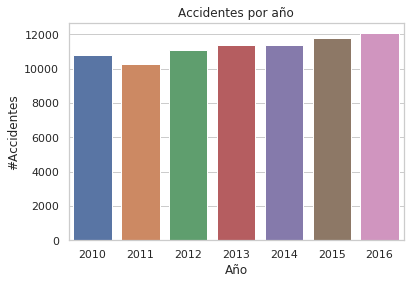

In [104]:
#cantidad de siniestros a por año
ax=sns.countplot('nk_any',data=data)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Año')
ax.set_title('Accidentes por año')

La siniestralidad viene en aumento. Habría que revisar si la población también, y si es lo mismo para cada tipo de vehículo

In [106]:
#Tipos de vehículos:
tipo_vehic=data.groupby('desc._tipus_vehicle_implicat').nk_any.count().sort_values(ascending=False)
tipo_vehic

desc._tipus_vehicle_implicat
Motocicleta             37003
Turismo                 19767
Ciclomotor               9035
Bicicleta                4030
Autobús                  2980
Taxi                     2877
Furgoneta                2122
Camión <= 3,5 Tm          290
Autobús articulado        122
Camión > 3,5 Tm           110
Tranvía o tren            106
Otros vehíc. a motor      102
Todo terreno               93
Autocar                    43
Cuadriciclo <75cc          32
Tractocamión               29
Microbus <=17 plazas       16
Cuadriciclo >=75cc         12
Maquinaria de obras        11
Name: nk_any, dtype: int64

In [107]:
#peso de la variable
(tipo_vehic/tipo_vehic.sum()).round(2)

desc._tipus_vehicle_implicat
Motocicleta             0.47
Turismo                 0.25
Ciclomotor              0.11
Bicicleta               0.05
Autobús                 0.04
Taxi                    0.04
Furgoneta               0.03
Camión <= 3,5 Tm        0.00
Autobús articulado      0.00
Camión > 3,5 Tm         0.00
Tranvía o tren          0.00
Otros vehíc. a motor    0.00
Todo terreno            0.00
Autocar                 0.00
Cuadriciclo <75cc       0.00
Tractocamión            0.00
Microbus <=17 plazas    0.00
Cuadriciclo >=75cc      0.00
Maquinaria de obras     0.00
Name: nk_any, dtype: float64

El 47% de los accidentes son causados por Motocicletas, y ciertamente sabemos que no es el % de vehículos en el parque automotor, por lo que podemos concluír que tienen una elevada siniestralidad en comparacion con el resto de los vehículos.   
   
Tambié para un análisis mas sencillo agruparemos los tipos de vehiculos que no alcanzan al 3% de los accidentes.

In [108]:
#Feature engenieering, Otros:Grupos con menos del 3% de participacion.

def tipo_vehic(vehiculo):
    vehic_name=vehiculo
    vehic_list=['Motocicleta','Turismo','Ciclomotor','Bicicleta','Autobús','Taxi','Furgoneta']
    if not vehic_name in vehic_list:
            vehic_name='Otros'
    return vehic_name


In [109]:
data['tipo_vehic']=data['desc._tipus_vehicle_implicat'].apply(lambda x: tipo_vehic(x))
data.groupby('tipo_vehic').nk_any.count().sort_values(ascending=False)


tipo_vehic
Motocicleta    37003
Turismo        19767
Ciclomotor      9035
Bicicleta       4030
Autobús         2980
Taxi            2877
Furgoneta       2122
Otros            966
Name: nk_any, dtype: int64

In [111]:
#como funciona la siniestralidad por año y tipo de vehiculo. En ppio deberia esatr creciendo las bicicletas, debido a que la ciudad implementó bicing
vehic_year=data.groupby(['tipo_vehic','nk_any']).codi_barri.count().reset_index()
#pd.crosstab()
pd.pivot_table(vehic_year,index=['tipo_vehic'],columns=['nk_any'],values='codi_barri')

nk_any       2010  2011  2012  2013  2014  2015  2016
tipo_vehic                                           
Autobús       364   376   358   437   404   516   525
Bicicleta     353   467   644   567   621   633   745
Ciclomotor   1759  1391  1344  1183  1247  1067  1044
Furgoneta     333   285   305   341   251   321   286
Motocicleta  4712  4585  4911  5268  5536  5849  6142
Otros         136   115   147   135   138   131   164
Taxi          409   371   471   435   396   398   397
Turismo      2739  2706  2885  3010  2793  2865  2769

Efectivamente Bicicleta y Motocicleta vienen en ascenso. Politicas de Bike/Moto Sharing, y Bicing. generan mas usuarios.

Ciclomoters en disminucion. Probablemente por el reemplazo de electricas.

In [112]:
#tipo de implicado vision general:
tip_persona=data.groupby('descripció_tipus_persona').nk_any.count().reset_index()
tip_persona['perc']=(tip_persona.nk_any/tip_persona.nk_any.sum()).round(2)
tip_persona

descripció_tipus_persona  nk_any  perc
0                Conductor   54320  0.69
1                Passatger   16026  0.20
2                  Vianant    8434  0.11

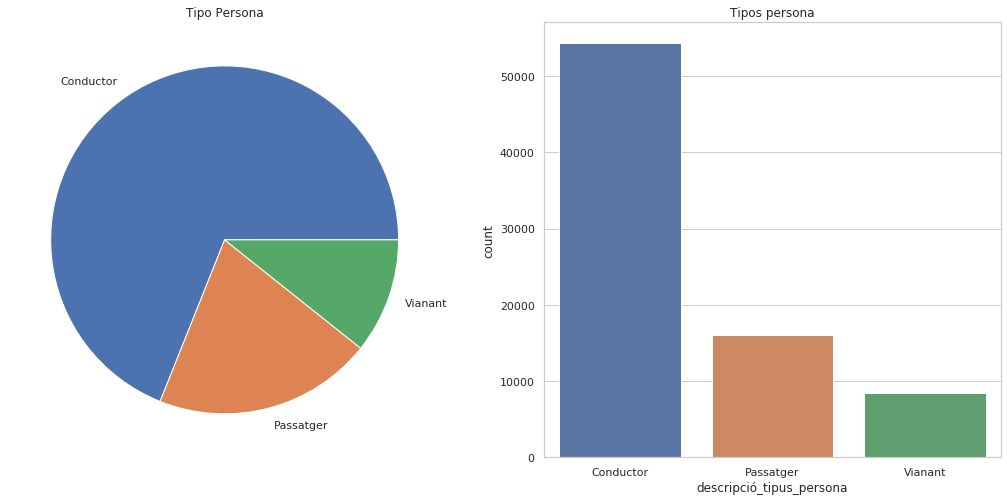

In [113]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['descripció_tipus_persona'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Tipo Persona')
ax[0].set_ylabel('')
sns.countplot('descripció_tipus_persona',data=data,ax=ax[1])
ax[1].set_title('Tipos persona')
plt.show()

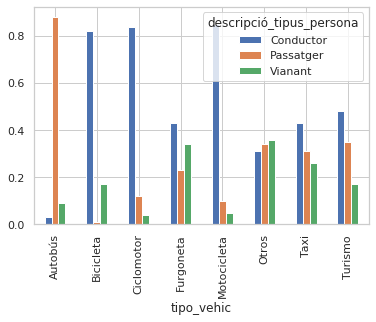

In [116]:
#Por tipo de implicado:
pd.crosstab(data['tipo_vehic'],data.descripció_tipus_persona,normalize='index').round(2).plot(kind='bar')

Podemos identificar tres grupos que acuerdan claramente con la razon del vehiculo:
-Unipersonales: Motocicleta/Ciclomotor/Bicicleta:+80%Accidente Conductor   
-Pasajeros: Turismo/Taxi/Furgoneta/Otos: 40% cond/30%Pasageros/30%peatones   
-Autobús: Pasageros 90%

In [117]:
#Sexo
sex=data.groupby('descripció_sexe').nk_any.count().sort_values(ascending=False).reset_index()
sex['perc']=(sex.nk_any/sex.nk_any.sum()).round(2)
sex

descripció_sexe  nk_any  perc
0            Home   48636  0.62
1            Dona   30139  0.38
2      Desconegut       5  0.00

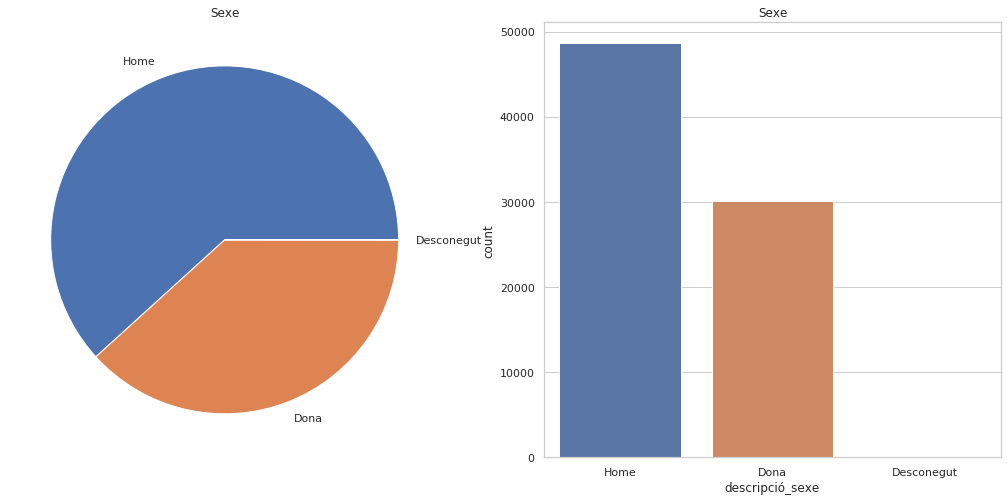

In [118]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['descripció_sexe'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Sexe')
ax[0].set_ylabel('')
sns.countplot('descripció_sexe',data=data,ax=ax[1])
ax[1].set_title('Sexe')
plt.show()

In [119]:
#Elimino 5 registros con Sexo desconocido.
data=data[data['descripció_sexe']!='Desconegut']

Text(0.5, 0, 'Tipo de Vehiculo')

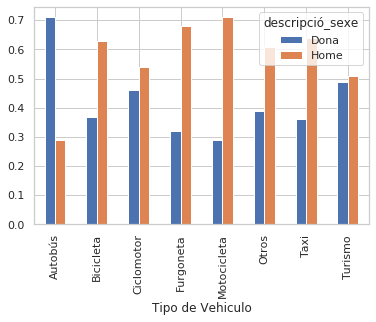

In [126]:
#Veamos si hay alguna tendencia respecto al tipo de vehiculo:
pd.crosstab(data['tipo_vehic'],data.descripció_sexe,normalize='index').round(2).plot(kind='bar').set_xlabel('Tipo de Vehiculo')

Siendo que las mujeres viajan mas en autobus, propablemente la tendencia sea la misma respecto al tipo de victima.

Text(0.5, 0, 'Tipo de persona')

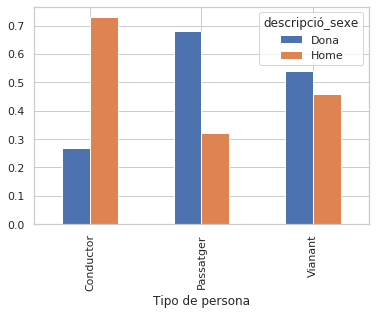

In [125]:
pd.crosstab(data['descripció_tipus_persona'],data.descripció_sexe,normalize='index').round(2).plot(kind='bar').set_xlabel('Tipo de persona')

Como era de esperar la tendencia de conductores es que sean mas hombres, pero pasageros son mujeres. Respecto a los peatones, la distribución deberia corresponder a la media poblacional.

In [127]:
#Veamos edades:
data.edat.replace('Desconegut','-1',inplace=True)
data.edat=data.edat.astype(int)

In [128]:
#cuantas edades desconocidas hay?
data.edat.value_counts()[-1]

726

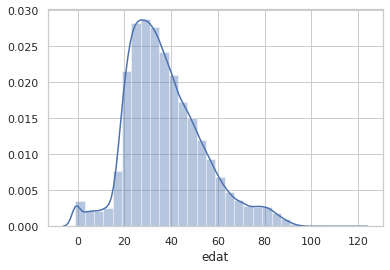

In [129]:
data.edat.mean()
sns.distplot(data['edat'],bins=30)

Male mu,std: 36.68 15.45
Male mu,std: 38.25 17.99


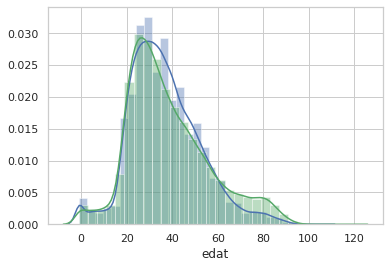

In [130]:
print('Male mu,std:',data[data['descripció_sexe']=='Home']['edat'].mean().round(2),data[data['descripció_sexe']=='Home']['edat'].std().round(2))
print('Male mu,std:',data[data['descripció_sexe']=='Dona']['edat'].mean().round(2),data[data['descripció_sexe']=='Dona']['edat'].std().round(2))


sns.distplot(data[data['descripció_sexe']=='Home']['edat'],bins=30,color='b')
sns.distplot(data[data['descripció_sexe']=='Dona']['edat'],bins=30,color='g')


Text(0.5, 1.0, 'Edad x Tipo Vehiculo')

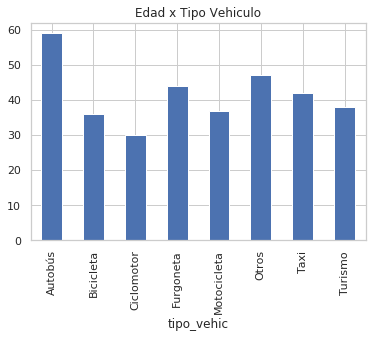

In [138]:
#Edades por tipo de vehículo:
data.groupby(['tipo_vehic'])['edat'].mean().round(0).plot(kind='bar').set_title('Edad x Tipo Vehiculo')

In [132]:
#cuanto pesan las sin edad?
edad_desc=data[data['edat']==-1]
edad_desc.tipo_vehic.value_counts()/data.tipo_vehic.value_counts()

Autobús        0.010067
Bicicleta      0.002730
Ciclomotor     0.002435
Furgoneta      0.018859
Motocicleta    0.005594
Otros          0.016563
Taxi           0.009388
Turismo        0.018872
Name: tipo_vehic, dtype: float64

In [133]:
#reemplazo las edades desconocidas por la media de cada tipo de vehiculo.
edad_media=data.edat.mean().astype(int)

def replace_age(cols):
    age=cols[0]
    vehic=cols[1]
    
    if age == -1:
        if vehic=='Autobús':
            return 58
        elif vehic=='Otros':
            return 46
        elif vehic=='Taxi':
            return 42
        elif vehic == 'Furgoneta':
            return 43
        elif vehic == 'Bicicleta':
            return 30
        else:
            return edad_media
    else:
        return age

    
data.edat=data[['edat','tipo_vehic']].apply(replace_age,axis=1)

Text(0.5, 1.0, 'Edad x Tipo de Vehiculo y sexo')

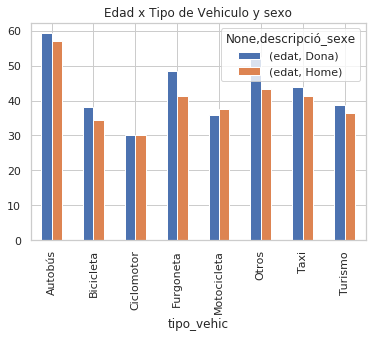

In [140]:
#edades por tipo de vehiculo y sexo:
pd.pivot_table(data,values=['edat'],index=['tipo_vehic'],columns=['descripció_sexe'],aggfunc=np.mean).round(2).plot(kind='bar').set_title('Edad x Tipo de Vehiculo y sexo')

Text(0.5, 1.0, 'Edad por Tipo Vehic y Persona')

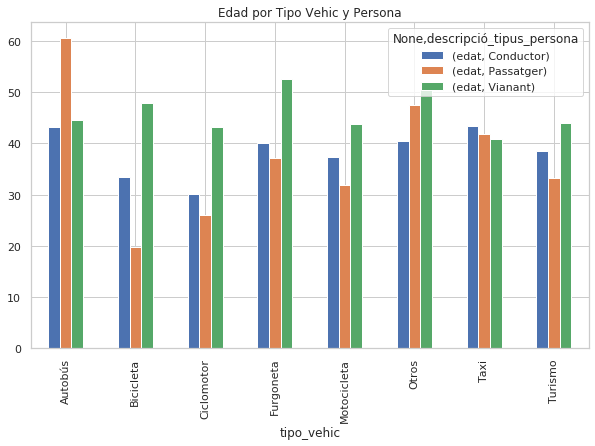

In [147]:
#edades por tipo de vehiculo y tipo de persona
pd.pivot_table(data,values=['edat'],index=['tipo_vehic'],columns=['descripció_tipus_persona'],aggfunc=np.mean).round(2).plot(kind='bar',figsize=(10,6)).set_title('Edad por Tipo Vehic y Persona')

In [148]:
data.groupby(['descripció_tipus_persona']).edat.mean().round(2)

descripció_tipus_persona
Conductor    36.47
Passatger    37.75
Vianant      45.05
Name: edat, dtype: float64

Hay una notoria diferencia de edad entre victimas de accidentes de Autobus y el resto. Y cuando vemos conductores, es claro que Bicicletas y Ciclomotores son manejados por mas jovenes.   
También las victimas peatones tienen un promedio de edad mayor (+10yrs)

In [150]:
#Severidad
sev=data.groupby('descripció_victimització').nk_any.count().sort_values(ascending=False).reset_index()
sev['perc']=(sev.nk_any/sev.nk_any.sum()).round(2)
sev


descripció_victimització  nk_any  perc
0               Ferit lleu   76941  0.98
1               Ferit greu    1628  0.02
2                     Mort     206  0.00

In [151]:
#veamos accidentes por tipo de vehículo:

pd.crosstab(data['tipo_vehic'],data.descripció_victimització,normalize='index').round(2)

descripció_victimització  Ferit greu  Ferit lleu  Mort
tipo_vehic                                            
Autobús                         0.02        0.98  0.00
Bicicleta                       0.02        0.97  0.00
Ciclomotor                      0.02        0.98  0.00
Furgoneta                       0.02        0.98  0.00
Motocicleta                     0.03        0.97  0.00
Otros                           0.04        0.94  0.02
Taxi                            0.02        0.98  0.00
Turismo                         0.01        0.99  0.00

In [152]:
#por tipo de persona?
pd.crosstab(data['descripció_tipus_persona'],data.descripció_victimització,normalize='index').round(2)#.plot(kind='bar').set_xlabel('Tipo de persona')

descripció_victimització  Ferit greu  Ferit lleu  Mort
descripció_tipus_persona                              
Conductor                       0.02        0.98  0.00
Passatger                       0.01        0.99  0.00
Vianant                         0.06        0.93  0.01

In [153]:
#los graves por tipo de vehiculo?
graves=data[data['descripció_victimització']=='Mort']
graves.tipo_vehic.value_counts()

Motocicleta    120
Turismo         36
Otros           17
Bicicleta        9
Ciclomotor       8
Autobús          7
Taxi             6
Furgoneta        3
Name: tipo_vehic, dtype: int64

In [154]:
graves.descripció_tipus_persona.value_counts()

Conductor    116
Vianant       83
Passatger      7
Name: descripció_tipus_persona, dtype: int64

In [158]:
graves.groupby(['tipo_vehic','descripció_tipus_persona']).nk_any.count().unstack()

descripció_tipus_persona  Conductor  Passatger  Vianant
tipo_vehic                                             
Autobús                         NaN        NaN      7.0
Bicicleta                       8.0        NaN      1.0
Ciclomotor                      7.0        1.0      NaN
Furgoneta                       NaN        NaN      3.0
Motocicleta                    90.0        3.0     27.0
Otros                           NaN        NaN     17.0
Taxi                            1.0        NaN      5.0
Turismo                        10.0        3.0     23.0

El 98% de los accidentes don leves.   
De los accidentes Mortales, el 40% son conductores de motocicleta. Y además las motocicletas causan un 14% de muertes adicionales, la mayoria peatones.   
Un 40% de las muertes son de peatones, de las cuales el 60% son causadas por moto y autos.

## EDA Part I - Variables Temporales:

Text(0.5, 1.0, 'Accidentes por año')

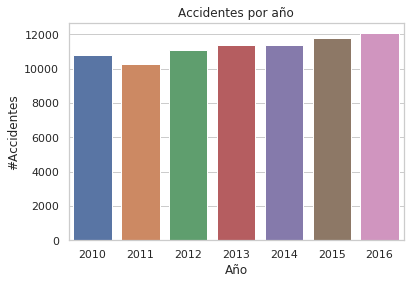

In [159]:
#cantidad de siniestros a por año
ax=sns.countplot('nk_any',data=data)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Año')
ax.set_title('Accidentes por año')

Text(0.5, 1.0, 'Accidentes por Tipo de vehic y Año')

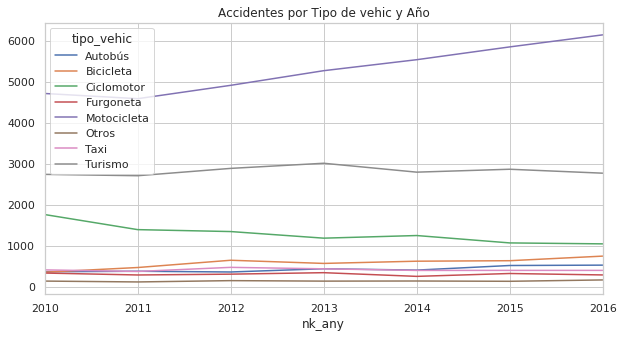

In [163]:
data.groupby(['tipo_vehic','nk_any']).codi_barri.count().unstack().T.plot(figsize=(10,5)).set_title('Accidentes por Tipo de vehic y Año')

Se puede observar un claro aumento en la siniestralidad de las Motocicletas, con una tendencia a la alza. Seguramente impulsada por las nuevas tecnologías y modelos de cooperacion como bike sharing, etc

Text(0.5, 1.0, 'Accidentes por mes del año')

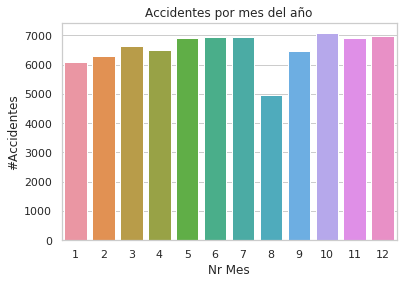

In [164]:
#MES
ax=sns.countplot('mes_de_any',data=data)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Nr Mes')
ax.set_title('Accidentes por mes del año')

Se puede observar una baja de accidentes en los meses de vacaciones, especialmente en Agosto/Septiembre. Verano.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

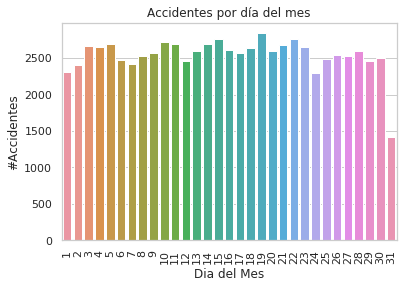

In [167]:
#Día del mes
ax=sns.countplot('dia_de_mes',data=data)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Dia del Mes')
ax.set_title('Accidentes por día del mes')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

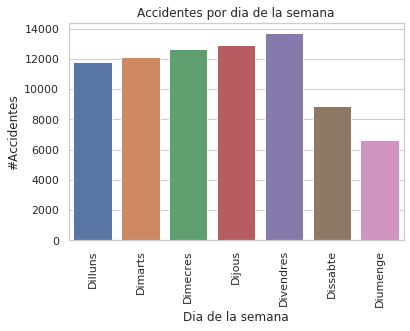

In [169]:
#Día de la semana
ax=sns.countplot('descripció_dia_setmana',data=data,order=['Dilluns', 'Dimarts', 'Dimecres', 'Dijous',
                                        'Divendres', 'Dissabte', 'Diumenge'])
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Dia de la semana')
ax.set_title('Accidentes por dia de la semana')
plt.xticks(rotation=90)

Los Viernes son el día con mas accidentes, los fines de semana menos. Veremos además la incidencia de los horarios.   

Para esto último debemos utilizar el año 2016, ya que 14 y 15 tienen mal el dato.

In [170]:
data2016=data[data['nk_any']==2016]

Text(0.5, 1, 'Accidents per dia de la setmana y hora 2016')

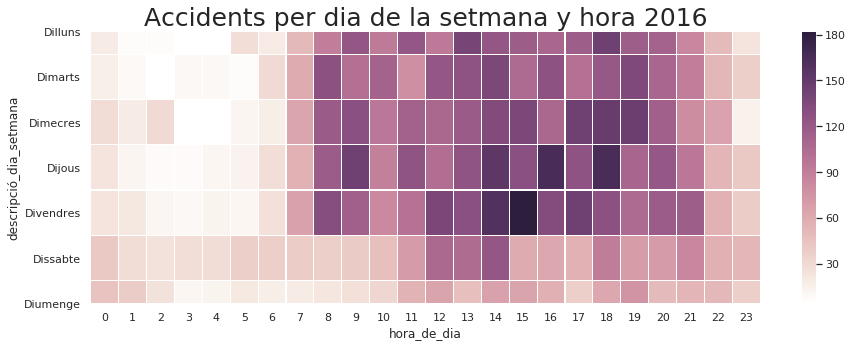

In [171]:
heat_data=data2016.groupby(['descripció_dia_setmana', 'hora_de_dia'])['nk_any'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
heat_data = heat_data.reindex(index = ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous',
                                        'Divendres', 'Dissabte', 'Diumenge'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,5))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per dia de la setmana y hora 2016', fontsize=25)

In [172]:
#paso a numerical el dia de la semana
def dia_semana(dia):
    if dia=='Diumenge':
        return 1
    elif dia=='Dilluns':
        return 2
    elif dia=='Dimarts':
        return 3
    elif dia=='Dimecres':
        return 4
    elif dia=='Dijous':
        return 5
    elif dia=='Divendres':
        return 6
    else:
        return 7


In [173]:
data['num_dia_semana']=data.descripció_dia_setmana.apply(lambda x: dia_semana(x))

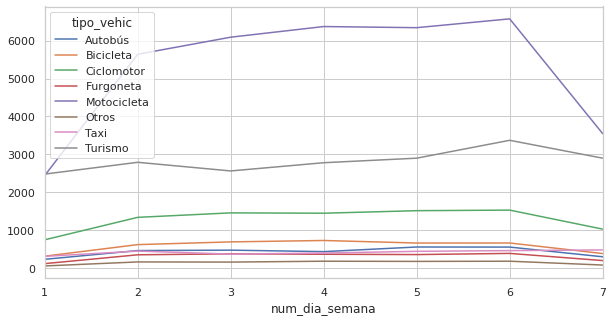

In [174]:
data.groupby(['tipo_vehic','num_dia_semana']).nk_any.count().unstack().T.plot(figsize=(10,5))

Los días con mas accidentes son Jueves y Viernes, los horarios entre las 16 y 18 hs, salvo los viernes que comienzan a ocurrir antes, siendo las 14 hs el momento con mas accidentes de la semana.   

## EDA Part I - Variables de Espacio:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

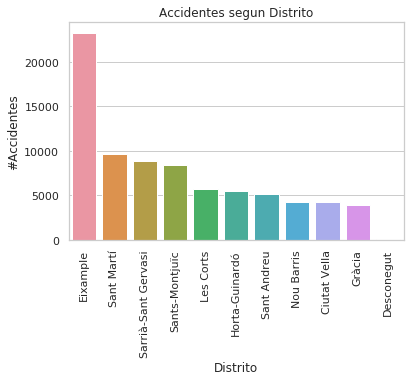

In [175]:
#Distritos:
x=data.nom_districte.value_counts().index
y=data.nom_districte.value_counts()
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Distrito')
ax.set_title('Accidentes segun Distrito')
plt.xticks(rotation=90)

Text(0.5, 1, 'Accidentes x Distrito y tipo de vehiculo')

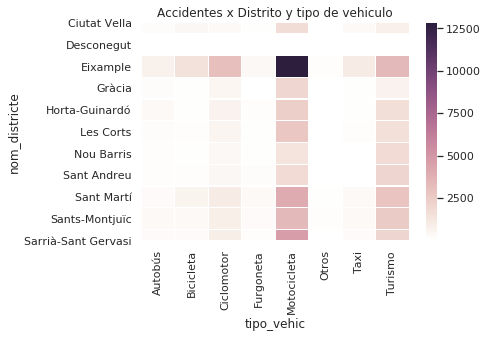

In [178]:
#Accidentes por nombre de distrito y tipo de vehiculo
dist_vehic=data.groupby(['nom_districte','tipo_vehic']).nom_barri.count().unstack()
sns.heatmap(dist_vehic,linewidths=.2,cmap=cmap)
plt.title('Accidentes x Distrito y tipo de vehiculo')

Text(0.5, 1, 'Importancia del distrito en cada Tipo de vehiculo')

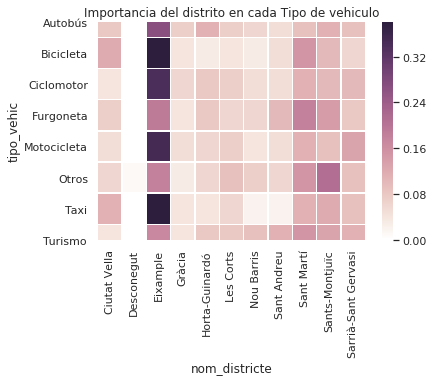

In [179]:
#Peso de distrito por tipo de vehiculo
dist_vehic2=pd.crosstab(data['tipo_vehic'],data.nom_districte,normalize='index').round(2)
sns.heatmap(dist_vehic2,linewidths=.2,cmap=cmap)
plt.title('Importancia del distrito en cada Tipo de vehiculo')

El distrito Eixample es el que más accidentes registra, y es el distrito con mayor peso específico para todos los tipos de vehículo

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

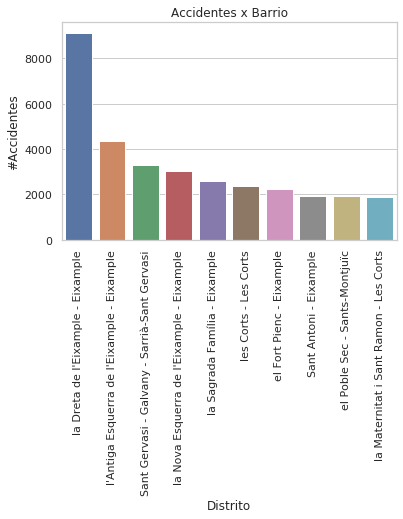

In [181]:
#BARRIOS

data['barri_dist']=data['nom_barri']+' - '+data['nom_districte']

x=data.barri_dist.value_counts().head(10).index
y=data.barri_dist.value_counts().head(10)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Distrito')
ax.set_title('Accidentes x Barrio')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

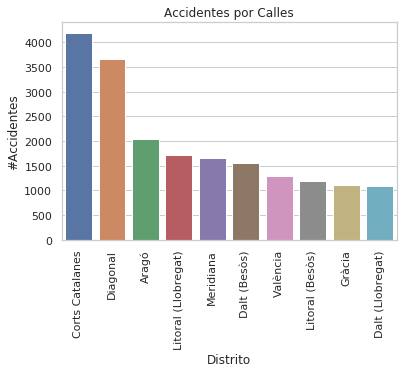

In [182]:
#Calles

x=data.nom_carrer.value_counts().head(10).index
y=data.nom_carrer.value_counts().head(10)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Distrito')
ax.set_title('Accidentes por Calles')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

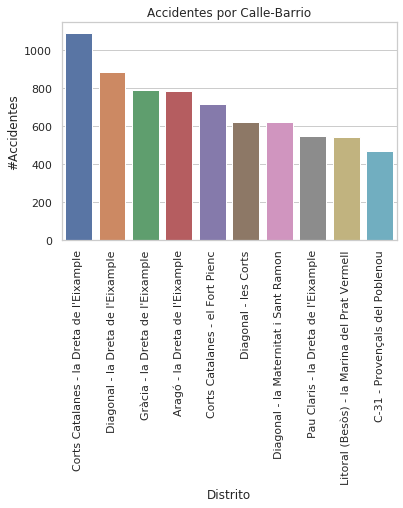

In [184]:
data['calle_barri']=data['nom_carrer']+' - '+data['nom_barri']

x=data.calle_barri.value_counts().head(10).index
y=data.calle_barri.value_counts().head(10)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Distrito')
ax.set_title('Accidentes por Calle-Barrio')
plt.xticks(rotation=90)

Las calles con mayor cantidad de Accidentes son Gran Vía y Diagonal. Pero al ser tan largas hemos armado la combinacion Calle-barrio para generar una segmentacion de alguna forma mas 'justa' entre calles

# BCN ACCIDENTS EDA PART II: 
### Focus on CAR ACCIDENTS (called Turismo)

Los accidentes de autos representan el 25% de los accidentes totales, entre los años 2010 y 2016

In [186]:
turismo=data[data['tipo_vehic']=='Turismo']
turismo.shape

(19765, 34)

Text(0.5, 1.0, 'Accidentes de autos por año')

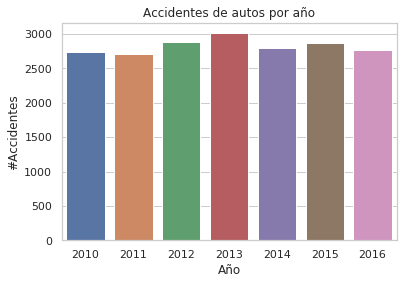

In [189]:
#Siniestros por año:
ax=sns.countplot('nk_any',data=turismo)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Año')
ax.set_title('Accidentes de autos por año')

La cantidad de siniestros de autos parece estable en el tiempo, con un pico particular en el año 2013.

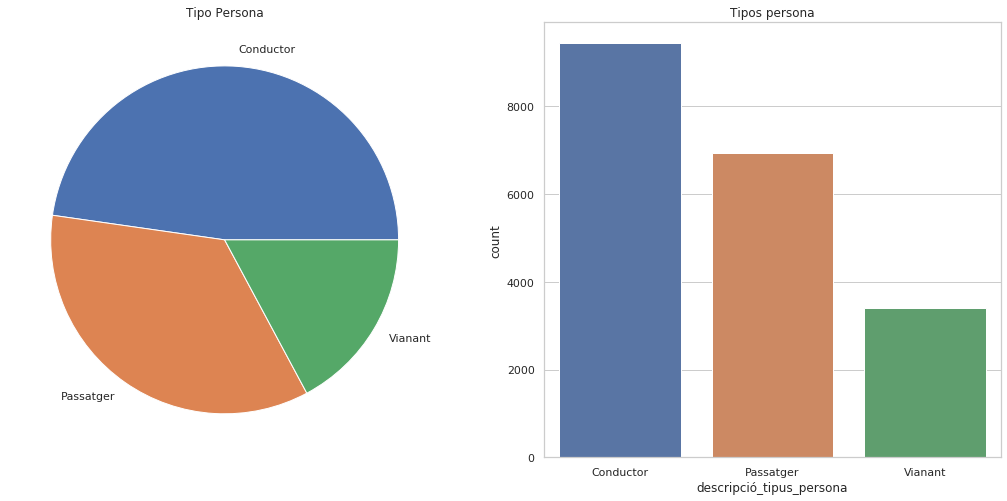

In [190]:
#composicion entre tipo de persona:
f,ax=plt.subplots(1,2,figsize=(18,8))
turismo['descripció_tipus_persona'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Tipo Persona')
ax[0].set_ylabel('')
sns.countplot('descripció_tipus_persona',data=turismo,ax=ax[1])
ax[1].set_title('Tipos persona')
plt.show()

In [191]:
tipo_persona=turismo.descripció_tipus_persona.value_counts().reset_index()
tipo_persona['perc']=(tipo_persona.descripció_tipus_persona/tipo_persona.descripció_tipus_persona.sum()).round(2)
tipo_persona

index  descripció_tipus_persona  perc
0  Conductor                      9436  0.48
1  Passatger                      6936  0.35
2    Vianant                      3393  0.17

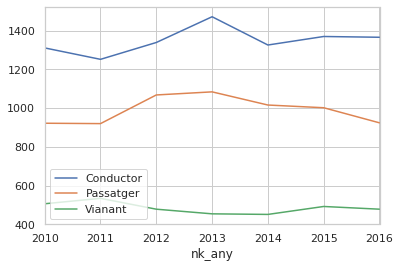

In [192]:
turismo.groupby(['descripció_tipus_persona','nk_any']).codi_barri.count().unstack().T.plot().legend(loc='lower left')

El 48% de los accidentes son sobre conductores, la tendencia total es estable, y la de conductores pareciera serlo tambien. En especial los ultimos 3 años.

Para este trabajo en particular, trabajaré con los conductores, para entender sus patrones, y luego un inicio de clusterización de ellos.

In [194]:
#Creo dataset de Conductores de autos
conduc=turismo[turismo['descripció_tipus_persona']=='Conductor']
conduc.shape

(9436, 34)

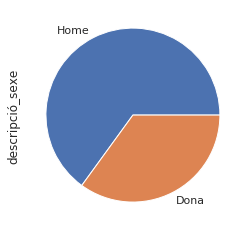

In [196]:
# vamos a ver sexo:

conduc.descripció_sexe.value_counts(normalize=True).round(2).plot(kind='pie')

A diferencia de los accidentes con autos involucrados donde la proporcion Hombre mujer es de un 51%-49%, Los conductores involucrados en siniestros son un 65%H/35%M.

In [198]:
#Edades:
np.round(conduc.edat.mean().round(2),2),np.round(conduc.edat.std(),2)


(38.57, 13.92)

Male mu,std: 38.98 14.38
Male mu,std: 37.8 12.96


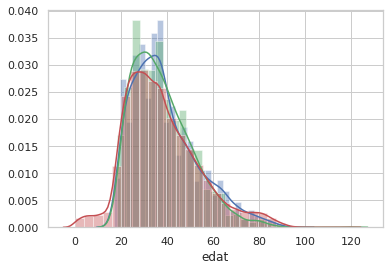

In [199]:
print('Male mu,std:',conduc[conduc['descripció_sexe']=='Home']['edat'].mean().round(2),conduc[conduc['descripció_sexe']=='Home']['edat'].std().round(2))
print('Male mu,std:',conduc[conduc['descripció_sexe']=='Dona']['edat'].mean().round(2),conduc[conduc['descripció_sexe']=='Dona']['edat'].std().round(2))


sns.distplot(conduc[conduc['descripció_sexe']=='Home']['edat'],bins=30,color='b')
sns.distplot(conduc[conduc['descripció_sexe']=='Dona']['edat'],bins=30,color='g')
sns.distplot(data['edat'],bins=30,color='r')

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


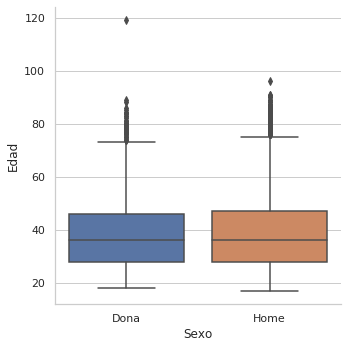

In [200]:
g = sns.factorplot( "descripció_sexe",'edat', data=conduc, kind="box")
g.set_axis_labels("Sexo", "Edad")

Las distribuciones de edades entre Hombre y Mujer son similares, teniendo una media muy parecida. Revisaremos a continuacion los quantiles de edad, para luego tener un rango de edades donde poder acumular cada 25% de la distribucion

In [203]:
#Quantiles de edad para resumir la distribución en categorias de edades:
print('IQ:',conduc.edat.quantile(0.25))
print('IIQ:',conduc.edat.quantile(0.5))
print('IIIQ:',conduc.edat.quantile(0.75))


IQ: 28.0
IIQ: 36.0
IIIQ: 47.0


In [204]:
def rango_edad(edad):
    if edad<28:
        return '0-27'
    elif edad<36:
        return '28-35'
    elif edad<47:
        return '36-46'
    else:
        return '47-'

In [205]:
conduc['rango_edad']=conduc.edat.apply(lambda x: rango_edad(x))
conduc.rango_edad.value_counts()

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


36-46    2490
47-      2372
28-35    2342
0-27     2232
Name: rango_edad, dtype: int64

In [206]:
#Revisar Severidad:
conduc.descripció_victimització.value_counts()

Ferit lleu    9390
Ferit greu      36
Mort            10
Name: descripció_victimització, dtype: int64

In [207]:
conduc.groupby(['descripció_victimització','rango_edad']).nk_any.count().unstack()

rango_edad                0-27  28-35  36-46   47-
descripció_victimització                          
Ferit greu                   9      4      8    15
Ferit lleu                2221   2336   2480  2353
Mort                         2      2      2     4

## EDA Part II (Conductores Autos) - Variables Temporales:

Text(0.5, 1.0, 'Accidentes x Mes')

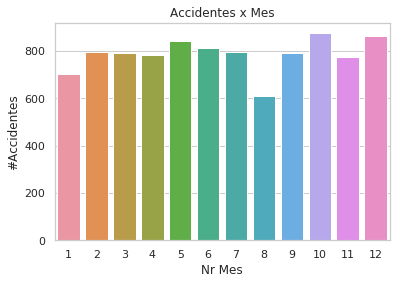

In [208]:
#MES
ax=sns.countplot('mes_de_any',data=conduc)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Nr Mes')
ax.set_title('Accidentes x Mes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

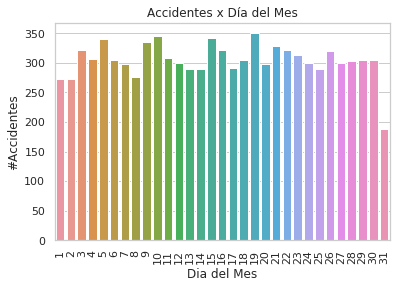

In [209]:
#Día del mes
ax=sns.countplot('dia_de_mes',data=conduc)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Dia del Mes')
ax.set_title('Accidentes x Día del Mes')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

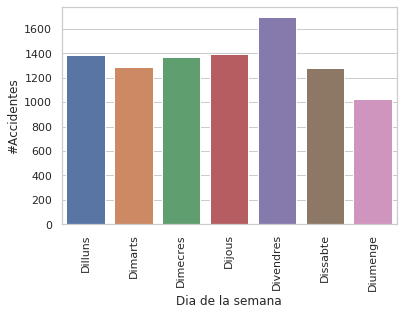

In [210]:
#Día de la semana
ax=sns.countplot('descripció_dia_setmana',data=conduc,order=['Dilluns', 'Dimarts', 'Dimecres', 'Dijous',
                                        'Divendres', 'Dissabte', 'Diumenge'])
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Dia de la semana')
plt.xticks(rotation=90)

In [212]:
#dataframe de conductores de autos accidentes 2016
conduc2016=conduc[conduc['nk_any']==2016]

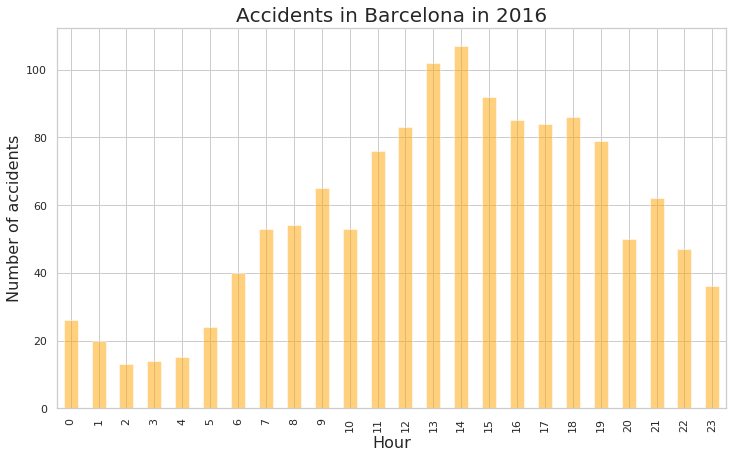

In [213]:
# Number of accident per hour
accidents_hour = conduc2016.hora_de_dia.value_counts().sort_index()

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in Barcelona in 2016', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

Text(0.5, 1, 'Accidents per dia de la setmana y hora 2016')

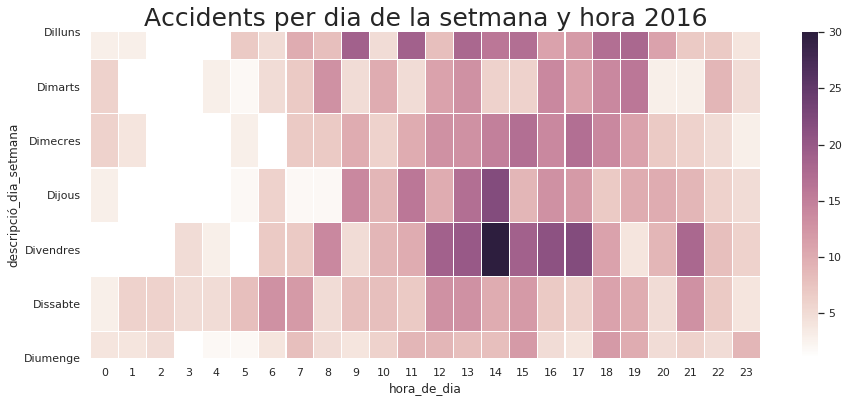

In [214]:
heat_data=conduc2016.groupby(['descripció_dia_setmana', 'hora_de_dia'])['nk_any'].count().to_frame().unstack()
heat_data.columns = heat_data.columns.droplevel()
heat_data = heat_data.reindex(index = ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous',
                                        'Divendres', 'Dissabte', 'Diumenge'])
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
plt.figure(figsize=(15,6))
sns.heatmap(heat_data,linewidths=.2,cmap=cmap)
plt.title('Accidents per dia de la setmana y hora 2016', fontsize=25)

Para Conductores de autos los días con más cantidad de siniestros son lunes,jueves y viernes. A diferencia con el total aquí el lunes tiene una importancia importyante, sobre todo por la mañana.

## EDA Part II (Conductores Autos) - Variables de Espacio:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

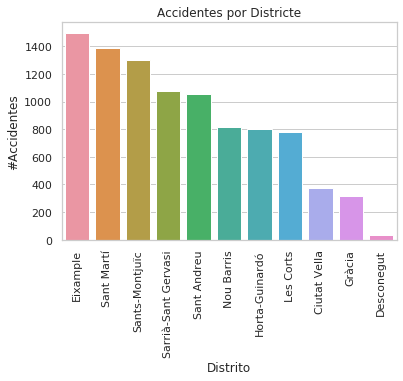

In [215]:
#Distritos:
x=conduc.nom_districte.value_counts().index
y=conduc.nom_districte.value_counts()
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Distrito')
ax.set_title('Accidentes por Districte')
plt.xticks(rotation=90)

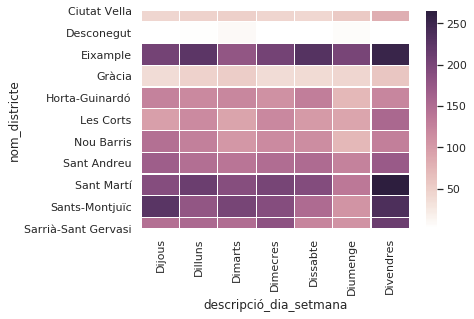

In [216]:
dist_vehic=conduc.groupby(['nom_districte','descripció_dia_setmana']).nom_barri.count().unstack()
sns.heatmap(dist_vehic,linewidths=.2,cmap=cmap)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

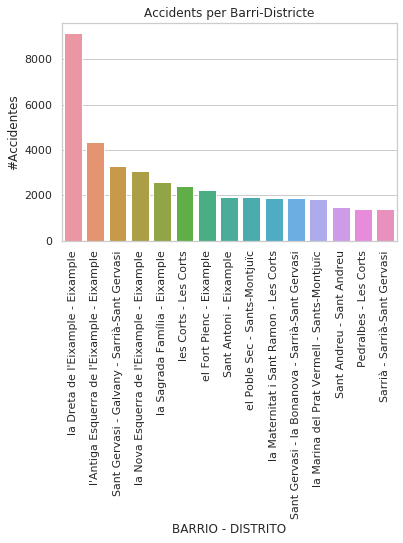

In [218]:
#BARRIOS
data['barri_dist']=data['nom_barri']+' - '+data['nom_districte']

x=data.barri_dist.value_counts().head(15).index
y=data.barri_dist.value_counts().head(15)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('BARRIO - DISTRITO')
ax.set_title('Accidents per Barri-Districte')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

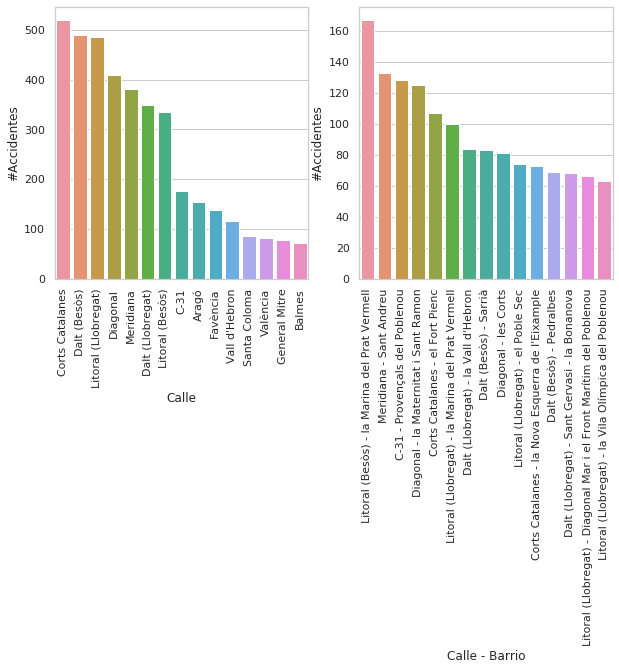

In [219]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
x=conduc.nom_carrer.value_counts().head(15).index
y=conduc.nom_carrer.value_counts().head(15)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Calle')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
x=conduc.calle_barri.value_counts().head(15).index
y=conduc.calle_barri.value_counts().head(15)
ax=sns.barplot(x=x,y=y)
ax.set_ylabel('#Accidentes')
ax.set_xlabel('Calle - Barrio')
plt.xticks(rotation=90)

El distrito con más accidentes sigue siendo el Eixample, pero aquí la diferencia no es tan abismal como en el total de accidentes. En este caso Sant Martí y Montjuic estan a la par.

## EDA Part II (Conductores Autos) - Maping Accidents:

In [222]:
import folium
from folium.plugins import HeatMap,Fullscreen

#creo mapa de fondo - situado en Barcelona
barcelona_map2 = folium.Map(location=[41.38879, 2.15899], zoom_start=13)

#dataframe con lat y long
heat_df=conduc[['geo_lat','geo_long']]

heat_data=[[row['geo_lat'],row['geo_long']] for index,row in heat_df.iterrows() ]

#agrego el mapa de calor al mapa base
HeatMap(heat_data).add_to(barcelona_map2)

#agrego funcionalidad para poder ponerlo en full screen
Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(barcelona_map2)

print('Mapa de Calor Accidentes de conductores de autos año 2016')

barcelona_map2

In [224]:
barcelona_map3 = folium.Map(location=[41.38879, 2.15899], zoom_start=13)

heat_df=conduc2016[['geo_lat','geo_long']]

heat_data=[[row['geo_lat'],row['geo_long']] for index,row in heat_df.iterrows() ]

HeatMap(heat_data).add_to(barcelona_map3)

Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
).add_to(barcelona_map3)

print('Mapa de Calor Accidentes de Conductores de Auto año 2016')
barcelona_map3

Mapa de Calor Accidentes de Conductores de Auto año 2016


Aquí se puede apreciar claramente los barrios y calles con más accidentes.

# Clustering Accidentes de Conductores 2016

Como hemos visto, el horario de accidente es una variable representativa de la siniestralidad, por lo que he decidido trabajar con los accidentes del año 2016, para no perder información.    

En esta ocasión aplicaré KMeans, algoritmo que resuelve la cantidad de clusters optimos para resolver el minimo de la suma de los errores cuadrados.

In [225]:
#prepare de dataset for KMeans:
conduc_cluster16=conduc2016[['descripció_sexe','codi_barri','codi_districte','codi_carrer','dia_de_mes','num_dia_semana','edat','mes_de_any','hora_de_dia']]

Estaré dejando fuera de análisis la severidad del siniestro, ya que la cantidad de accidentes Graves y Muertes son muy pequeñas, considerandose Outliers, y generando que el algoritmo cree clusters separados para estas pocos casos.

In [226]:
#Formato de cada instancia
conduc_cluster16.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1366 entries, 2016S008630 to 2016S009775
Data columns (total 9 columns):
descripció_sexe    1366 non-null object
codi_barri         1366 non-null int64
codi_districte     1366 non-null int64
codi_carrer        1366 non-null int64
dia_de_mes         1366 non-null int64
num_dia_semana     1366 non-null int64
edat               1366 non-null int64
mes_de_any         1366 non-null int64
hora_de_dia        1366 non-null int64
dtypes: int64(8), object(1)
memory usage: 106.7+ KB


KMeans es un algoritmo que necesita variables númericas, por lo que crearé una variable dicotómica para el sexo.

In [227]:
#Creando OneHot Encoding for categorical data
conduc_cluster16=pd.get_dummies(conduc_cluster16,columns=['descripció_sexe'],drop_first=True)
conduc_cluster16.head()

codi_barri  codi_districte  codi_carrer  dia_de_mes  \
id                                                                 
2016S008630          22               5       202050          10   
2016S003984          21               4         6404          24   
2016S003984          21               4         6404          24   
2016S008934          21               4       701267          21   
2016S009607          21               4       115400          14   

             num_dia_semana  edat  mes_de_any  hora_de_dia  \
id                                                           
2016S008630               5    29          11           19   
2016S003984               3    23           5           17   
2016S003984               3    28           5           17   
2016S008934               2    38          11            7   
2016S009607               4    35          12           17   

             descripció_sexe_Home  
id                                 
2016S008630                     1  
2016S003984                     1  
2016S003984                     1  
2016S008934                     1  
2016S009607                     1

Correremos Gridsearch para estar seguros sobre el modelo y la tolerancia

In [263]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

parameters={'init':['k-means++','random'],
           'n_init':[10,100],
           'tol':[0.1,0.01,0.001,0.0001,0.00001],
           'n_clusters': np.arange(1,21)}




grid_search=GridSearchCV(KMeans(random_state=42),parameters,cv=5, verbose=True)
grid_search.fit(conduc_cluster16)


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:513: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  estimator.fit(X_train, **fit_params)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:513: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  estimator.fit(X_train, **fit_params)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:513: ConvergenceWarning: Number of distinct clusters (19) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  estimator.fit(X_train, **fit_params)
/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:513: Co

GridSearchCV(cv=5, error_score=nan,
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=8, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'init': ['k-means++', 'random'],
                         'n_clusters': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'n_init': [10, 100],
                         'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [264]:
#mejores parametros de la grilla
grid_search.best_params_

{'init': 'k-means++', 'n_clusters': 20, 'n_init': 10, 'tol': 0.01}

Para definir la cantidad ideal de clusters, utilizaremos el método del codo:

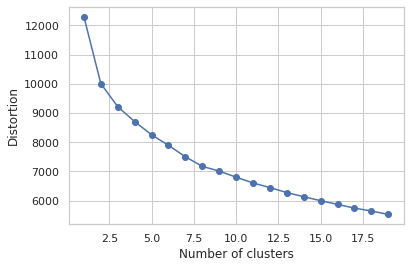

In [265]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

base_scaled=StandardScaler().fit_transform(conduc_cluster16)

distortions = []
for i in range(1, 20):
    
    
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.01, random_state=42
    )
    km.fit(base_scaled)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

En este caso, al tener tantas variables espaciales, como Barrio, Distrito y Calle, el codo genera más clusters para tener más centroides y generar menos distorción final.

Particularmente en esta ocasion, y para ser mas explicable, utilizaré 10 clusters, si bien por el análisis del codo podría ser 15 el ideal.

In [266]:
from sklearn.cluster import KMeans

km = KMeans(
        n_clusters=10, init='k-means++',
        n_init=10, max_iter=300,
        tol=0.01, random_state=42)

km.fit(base_scaled)
conduc2016['cluster1']=km.labels_

/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [267]:
#Check de tener creado la variable con los clusters asignados
conduc2016.head()

codi_barri  codi_carrer  codi_districte  coordenada_utm_(x)  \
id                                                                         
2016S008630          22       202050               5           424249.09   
2016S003984          21         6404               4           425090.32   
2016S003984          21         6404               4           425090.32   
2016S008934          21       701267               4           425098.69   
2016S009607          21       115400               4           425102.90   

             coordenada_utm_(y) desc._tipus_vehicle_implicat  \
id                                                             
2016S008630          4586527.04                      Turismo   
2016S003984          4581804.89                      Turismo   
2016S003984          4581804.89                      Turismo   
2016S008934          4581932.44                      Turismo   
2016S009607          4581982.00                      Turismo   

             descripció_causa_vianant descripció_dia_setmana descripció_sexe  \
id                                                                             
2016S008630  No és causa del  vianant                 Dijous            Home   
2016S003984  No és causa del  vianant                Dimarts            Home   
2016S003984  No és causa del  vianant                Dimarts            Home   
2016S008934  No és causa del  vianant                Dilluns            Home   
2016S009607  No és causa del  vianant               Dimecres            Home   

            descripció_situació descripció_tipus_dia descripció_tipus_persona  \
id                                                                              
2016S008630          Presentado              Laboral                Conductor   
2016S003984          Presentado              Laboral                Conductor   
2016S003984          Presentado              Laboral                Conductor   
2016S008934          Presentado              Laboral                Conductor   
2016S009607          Presentado              Laboral                Conductor   

            descripció_torn descripció_victimització  dia_de_mes dia_setmana  \
id                                                                             
2016S008630           Tarda               Ferit lleu          10          Dj   
2016S003984           Tarda               Ferit lleu          24          Dm   
2016S003984           Tarda               Ferit lleu          24          Dm   
2016S008934            Matí               Ferit lleu          21          Dl   
2016S009607           Tarda               Ferit lleu          14          Dc   

             edat  hora_de_dia        lat      long  mes_de_any  nk_any  \
id                                                                        
2016S008630    29           19  41.424889  2.092323          11    2016   
2016S003984    23           17  41.382430  2.102972           5    2016   
2016S003984    28           17  41.382430  2.102972           5    2016   
2016S008934    38            7  41.383583  2.103052          11    2016   
2016S009607    35           17  41.384034  2.103093          12    2016   

                                         nom_barri             nom_carrer  \
id                                                                          
2016S008630  Vallvidrera, el Tibidabo i les Planes            Mas Guimbau   
2016S003984                              Pedralbes  Alcalde Baró de Viver   
2016S003984                              Pedralbes  Alcalde Baró de Viver   
2016S008934                              Pedralbes           Dalt (Besòs)   
2016S009607                              Pedralbes              Esplugues   

                   nom_districte   nom_mes num_postal_caption  \
id                                                              
2016S008630  Sarrià-Sant Gervasi  Novembre         0001B0001B   
2016S003984            Les Corts      Maig          9999 9999   
2016S003984    

In [268]:
conduc2016.cluster1.unique()

array([1, 4, 3, 5, 0, 6, 9, 7, 8, 2])

# UNDERSTANDING EACH CLUSTER:

In [269]:
import folium
from folium.plugins import Fullscreen


barcelona_map = folium.Map(location=[41.38879, 2.15899], zoom_start=14)

colors=['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
             'gray', 'black', 'lightgray']


for i in range(0,len(conduc2016.cluster1)):
    color=colors[conduc2016.cluster1[i]]
    
    folium.Marker([conduc2016.geo_lat[i],conduc2016.geo_long[i]],
                 popup=f'cluster:{conduc2016.cluster1[i]}',
                 icon=folium.Icon(color)).add_to(barcelona_map)

In [270]:
Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True
    ).add_to(barcelona_map)
    
barcelona_map

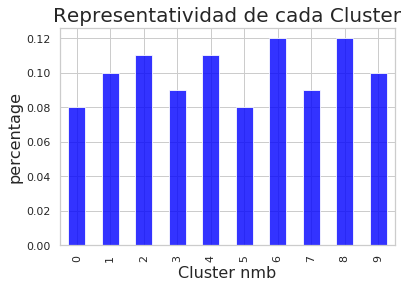

In [271]:
size_clusters=conduc2016.cluster1.value_counts(normalize=True).round(2).sort_index()
size_clusters.plot(kind='bar',color='blue',alpha=.8)

plt.title('Representatividad de cada Cluster', fontsize=20)
plt.xlabel('Cluster nmb',fontsize=16)
plt.ylabel('percentage',fontsize=16);

Edad media: 39.63


Text(0.5, 1.0, 'Edad media por Cluster')

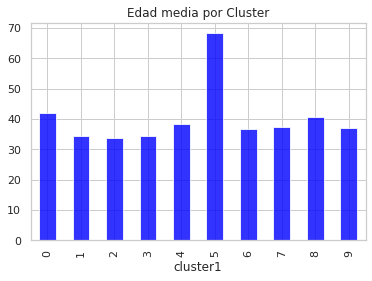

In [272]:
#Age

print('Edad media:',conduc2016.edat.mean().round(2))

conduc2016.groupby(['cluster1']).edat.mean().round(2).plot(kind='bar',color='blue',alpha=.8).set_title('Edad media por Cluster')



Text(0.5, 1.0, 'Distribucion por rango etareo de cada cluster')

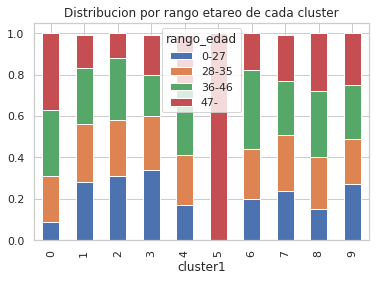

In [273]:
#Age distribution
age_dist=conduc2016.groupby(['cluster1']).rango_edad.value_counts(normalize=True).unstack().round(2)
age_dist.plot(kind='bar',stacked=True).set_title('Distribucion por rango etareo de cada cluster')


/home/alex/anaconda3/envs/bts36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


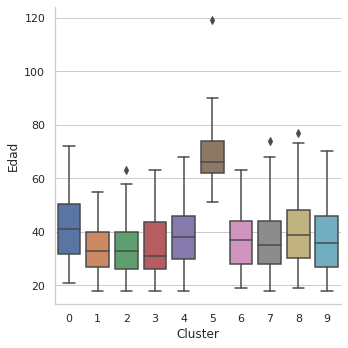

In [274]:
g = sns.factorplot( "cluster1",'edat', data=conduc2016, kind="box")
g.set_axis_labels("Cluster", "Edad")

Text(0.5, 1.0, 'Composición por Sexo en cada cluster')

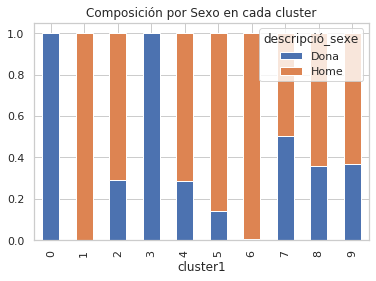

In [275]:
#Sexo
conduc2016.groupby(['cluster1']).descripció_sexe.value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
plt.title('Composición por Sexo en cada cluster')

Text(0.5, 1, 'Accidentes sobre el total - clusters')

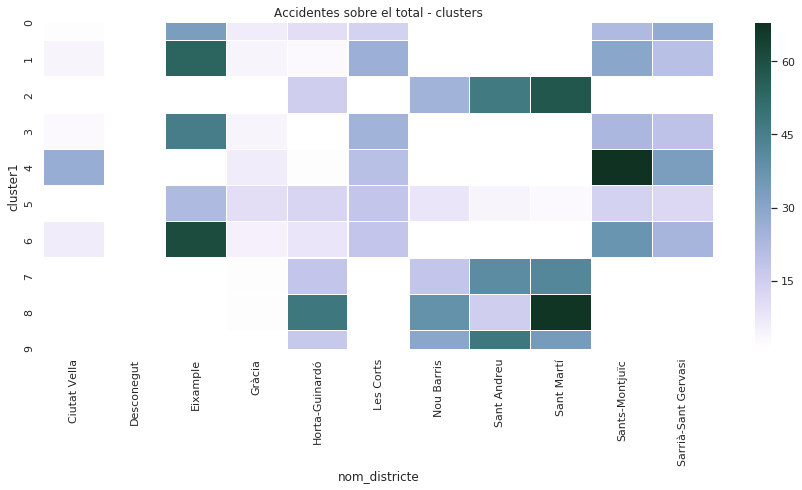

In [276]:
#Distrito

cmap2 = sns.cubehelix_palette(start=2,light=1, as_cmap=True)

plt.figure(figsize=(15,6))

dist_clus_num=conduc2016.groupby(['cluster1']).nom_districte.value_counts(normalize=False).unstack()

sns.heatmap(dist_clus_num,linewidths=.2,cmap=cmap2).set_title('Accidentes sobre el total - clusters')


Text(0.5, 1, 'Dias de accidentes - clusters')

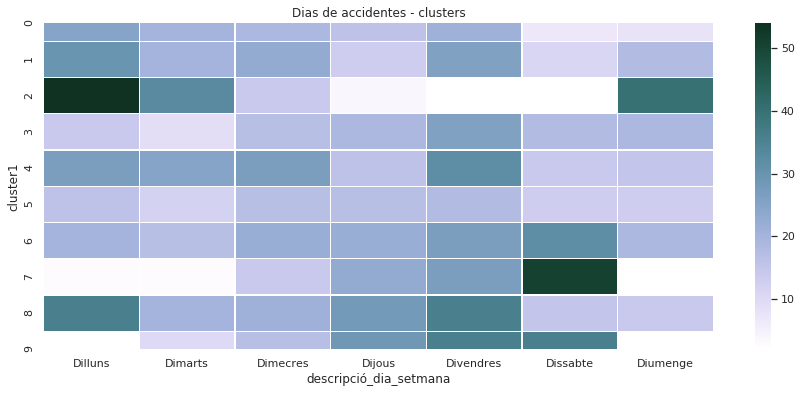

In [277]:
#DIAS
dia_clus=conduc2016.groupby(['cluster1']).descripció_dia_setmana.value_counts(normalize=False).unstack()
dia_clus=dia_clus.reindex(columns = ['Dilluns', 'Dimarts', 'Dimecres', 'Dijous',
                                        'Divendres', 'Dissabte', 'Diumenge'])
plt.figure(figsize=(15,6))
sns.heatmap(dia_clus,linewidths=.2,cmap=cmap2).set_title('Dias de accidentes - clusters')


Text(0.5, 1, 'Dias de accidentes - clusters')

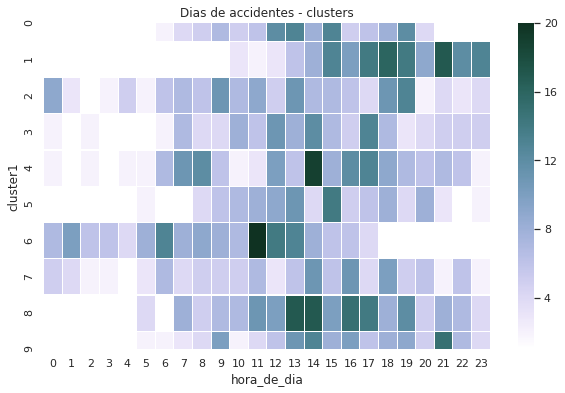

In [278]:
#HORA

hora_clus=conduc2016.groupby(['cluster1']).hora_de_dia.value_counts().unstack()
#index=conduc2016.barri_dist.value_counts().sort_values(ascending=False).index
#barri_clus=barri_clus.reindex(index=index)
plt.figure(figsize=(10,6))
sns.heatmap(hora_clus,linewidths=.2,cmap=cmap2).set_title('Dias de accidentes - clusters')


Text(0.5, 1, 'Dias de accidentes - clusters')

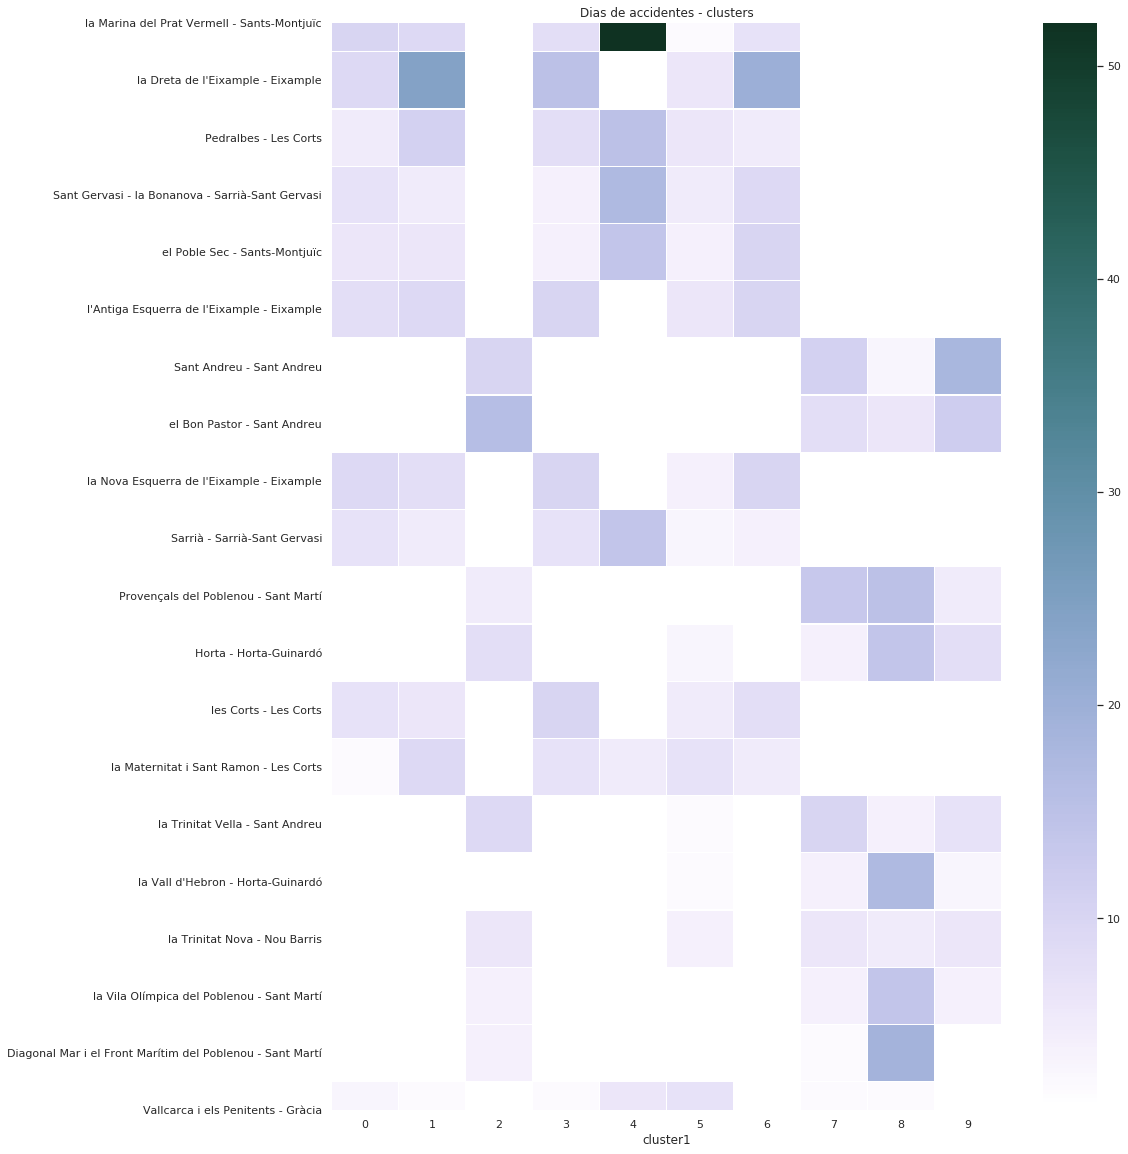

In [279]:
#BARRIO
barri_clus=conduc2016.groupby(['cluster1']).barri_dist.value_counts().unstack().T
index=conduc2016.barri_dist.value_counts().sort_values(ascending=False).index
barri_clus=barri_clus.reindex(index=index)
plt.figure(figsize=(15,20))
sns.heatmap(barri_clus.head(20),linewidths=.2,cmap=cmap2).set_title('Dias de accidentes - clusters')


In [280]:
conduc2016.to_csv('Bcn_Accidents_2016_Clusters.txt')